In [10]:
import numpy as np
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosRG.csv')
data

0         1         2         3         4         5         6  \
0      0.567933  0.468963  0.418387  0.397268  0.366222  0.314062  0.305755   
1      0.357207  0.312090  0.266491  0.252556  0.274381  0.292628  0.282017   
2      0.312563  0.307927  0.255154  0.212121  0.208340  0.222300  0.231618   
3      0.296776  0.307322  0.277153  0.242500  0.254109  0.283406  0.277839   
4      0.244860  0.183807  0.154699  0.148348  0.149485  0.151795  0.160408   
...         ...       ...       ...       ...       ...       ...       ...   
12116  0.110724  0.117143  0.108315  0.094340  0.095868  0.113917  0.128631   
12117  0.123169  0.056995  0.075046  0.085722  0.073361  0.089574  0.134921   
12118  0.149852  0.098694  0.087556  0.092886  0.097180  0.102063  0.106407   
12119  0.232100  0.166834  0.098958  0.090816  0.123015  0.141063  0.122684   
12120  0.243073  0.200749  0.192990  0.189484  0.179124  0.172621  0.180113   

              7         8         9  ...       334       335       336  \
0      0.396973  0.528640  0.530481  ...  0.553042  0.550603  0.541435   
1      0.257519  0.260231  0.286517  ...  0.593430  0.588292  0.572961   
2      0.234574  0.245502  0.252881  ...  0.621034  0.616308  0.600225   
3      0.244421  0.252737  0.305865  ...  0.607069  0.608714  0.599235   
4      0.173335  0.185585  0.187322  ...  0.720240  0.723352  0.713522   
...         ...       ...       ...  ...       ...       ...       ...   
12116  0.120617  0.103777  0.103601  ...  0.904124  0.903131  0.884643   
12117  0.136902  0.083655  0.069436  ...  0.914451  0.924044  0.919261   
12118  0.091439  0.060448  0.054961  ...  0.949209  0.963151  0.959169   
12119  0.100418  0.125119  0.179554  ...  0.909980  0.926298  0.928572   
12120  0.184541  0.172980  0.157746  ...  0.780299  0.786672  0.782953   

            337       338       339       340       341       342  id  
0      0.543974  0.556192  0.566876  0.602345  0.627477  0.676326   3  
1      0.566345  0.565697  0.559901  0.575898  0.581218  0.610140   3  
2      0.592773  0.591315  0.584525  0.600805  0.606444  0.637230   3  
3      0.597644  0.600575  0.595629  0.610977  0.611923  0.634690   3  
4      0.713116  0.717857  0.712581  0.730649  0.730299  0.754630   3  
...         ...       ...       ...       ...       ...       ...  ..  
12116  0.877637  0.877998  0.868636  0.891624  0.897031  0.938228   3  
12117  0.927998  0.943784  0.945054  0.974174  0.973854  1.000000   3  
12118  0.965922  0.976643  0.969675  0.989756  0.980251  1.000000   3  
12119  0.943763  0.964274  0.966858  0.993788  0.985947  1.000000   3  
12120  0.792973  0.811207  0.818890  0.852398  0.861424  0.894761   3  

[12121 rows x 344 columns]

In [3]:
df_data = pd.DataFrame(data)

In [4]:
data_t =  data.T

In [5]:
data_t

0         1         2         3         4         5         6      \
0    0.567933  0.357207  0.312563  0.296776  0.244860  0.350586  0.287251   
1    0.468963  0.312090  0.307927  0.307322  0.183807  0.336300  0.104099   
2    0.418387  0.266491  0.255154  0.277153  0.154699  0.309237  0.104618   
3    0.397268  0.252556  0.212121  0.242500  0.148348  0.307617  0.235937   
4    0.366222  0.274381  0.208340  0.254109  0.149485  0.335980  0.344171   
..        ...       ...       ...       ...       ...       ...       ...   
339  0.566876  0.559901  0.584525  0.595629  0.712581  0.569089  0.668886   
340  0.602345  0.575898  0.600805  0.610977  0.730649  0.581146  0.677691   
341  0.627477  0.581218  0.606444  0.611923  0.730299  0.585907  0.675752   
342  0.676326  0.610140  0.637230  0.634690  0.754630  0.618420  0.705150   
id   3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

        7         8         9      ...     12111     12112     12113  \
0    0.216728  0.271050  0.343475  ...  0.073647  0.294543  0.228736   
1    0.192897  0.249572  0.323105  ...  0.047541  0.245175  0.261757   
2    0.173718  0.303283  0.276764  ...  0.057108  0.194670  0.286758   
3    0.168887  0.343315  0.248043  ...  0.062392  0.203087  0.243508   
4    0.172591  0.342420  0.257685  ...  0.056868  0.234018  0.195193   
..        ...       ...       ...  ...       ...       ...       ...   
339  0.709209  0.635406  0.632324  ...  0.927872  0.700428  0.625857   
340  0.730824  0.674621  0.651088  ...  0.960252  0.711903  0.647480   
341  0.732848  0.692625  0.653213  ...  0.965770  0.698703  0.660524   
342  0.757787  0.727339  0.676759  ...  1.000000  0.702311  0.703410   
id   3.000000  3.000000  3.000000  ...  3.000000  3.000000  3.000000   

        12114     12115     12116     12117     12118     12119     12120  
0    0.150298  0.110549  0.110724  0.123169  0.149852  0.232100  0.243073  
1    0.101963  0.069216  0.117143  0.056995  0.098694  0.166834  0.200749  
2    0.330792  0.093381  0.108315  0.075046  0.087556  0.098958  0.192990  
3    0.400448  0.137289  0.094340  0.085722  0.092886  0.090816  0.189484  
4    0.061029  0.138639  0.095868  0.073361  0.097180  0.123015  0.179124  
..        ...       ...       ...       ...       ...       ...       ...  
339  0.917894  0.942603  0.868636  0.945054  0.969675  0.966858  0.818890  
340  0.871701  0.975971  0.891624  0.974174  0.989756  0.993788  0.852398  
341  0.750848  0.976396  0.897031  0.973854  0.980251  0.985947  0.861424  
342  0.605834  1.000000  0.938228  1.000000  1.000000  1.000000  0.894761  
id   3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  

[344 rows x 12121 columns]

In [6]:
data_t =  data_t.drop(labels='id', axis=0)
data.drop(columns='id', inplace=True)

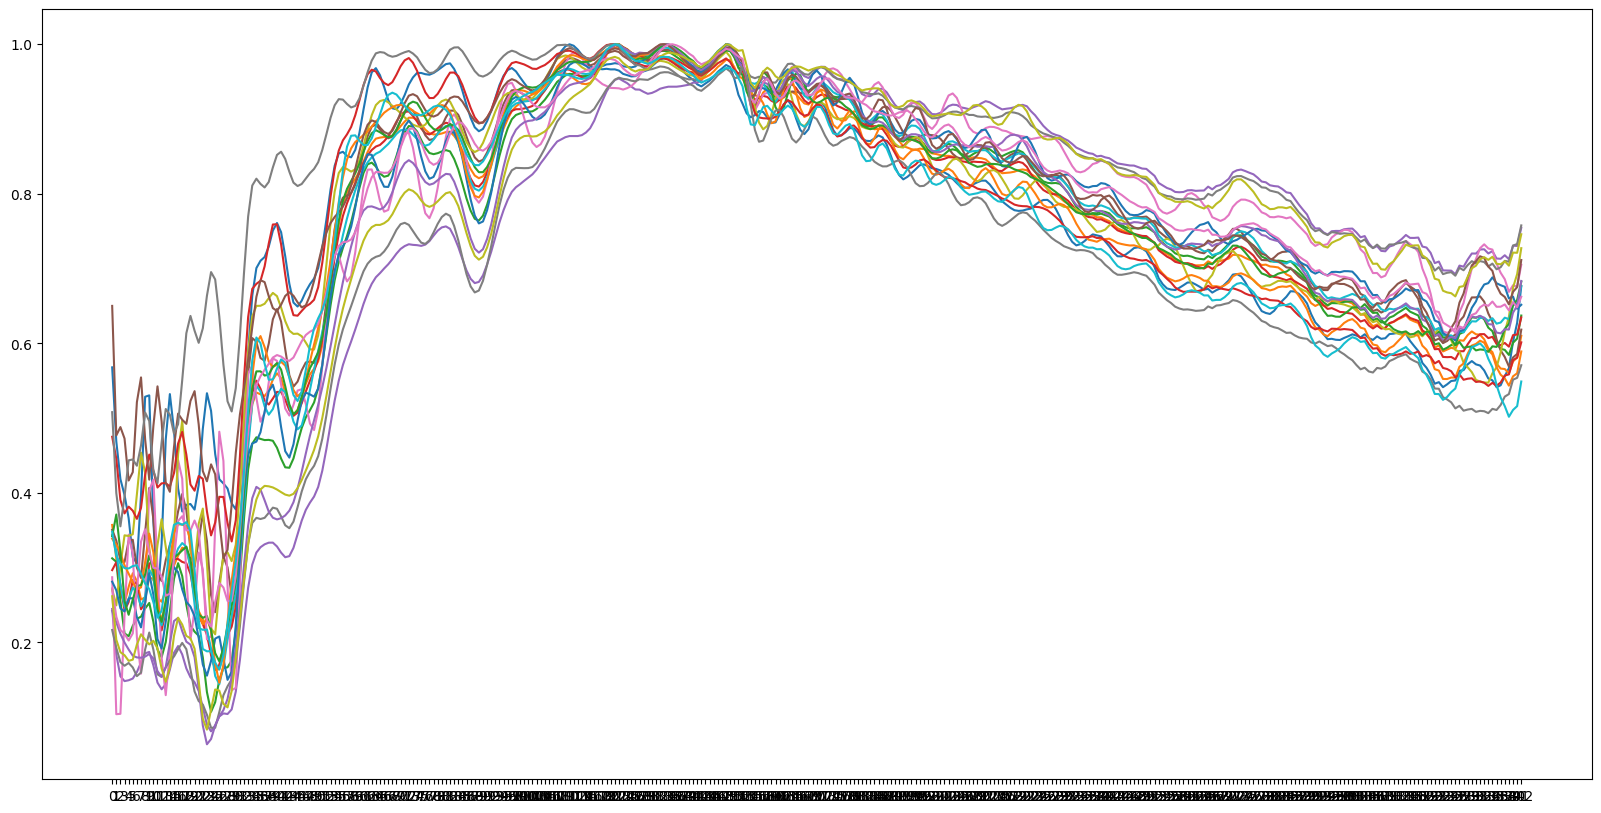

In [7]:
plt.figure(figsize=(20,10))
plt.plot(data_t.iloc[:, 0:20])

n_components = 1
Explained variance ratio: 0.78907
n_components = 2
Explained variance ratio: 0.97151
n_components = 3
Explained variance ratio: 0.98126
n_components = 4
Explained variance ratio: 0.98392
n_components = 5
Explained variance ratio: 0.98592
n_components = 6
Explained variance ratio: 0.98701
n_components = 7
Explained variance ratio: 0.98802
n_components = 8
Explained variance ratio: 0.98895
n_components = 9
Explained variance ratio: 0.98972
n_components = 10
Explained variance ratio: 0.99039
n_components = 11
Explained variance ratio: 0.99093
n_components = 12
Explained variance ratio: 0.99145
n_components = 13
Explained variance ratio: 0.99193
n_components = 14
Explained variance ratio: 0.99238
n_components = 15
Explained variance ratio: 0.99280
n_components = 16
Explained variance ratio: 0.99317
n_components = 17
Explained variance ratio: 0.99354
n_components = 18
Explained variance ratio: 0.99385
n_components = 19
Explained variance ratio: 0.99416
n_components = 20
Exp

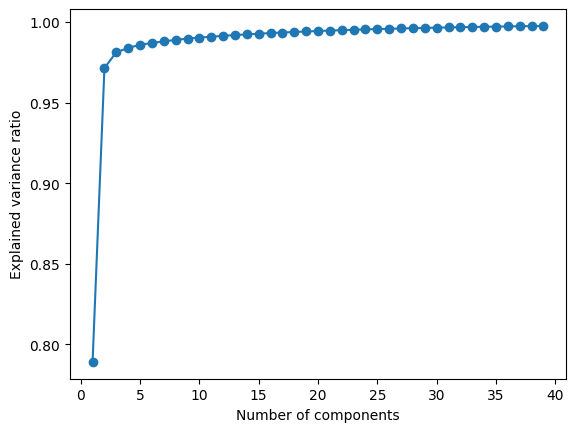

In [8]:
# assume that `data` contains your data
data = df_data.copy()
explained_variances = []
for n_components in range(1, 40):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.5f}")

# plot the explained variance ratio as a function of the number of components
import matplotlib.pyplot as plt
plt.plot(range(1, 40), explained_variances, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()


In [9]:
data = df_data.copy()
explained_variances = []
for n_components in range(1, 41):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.6f}")

n_components = 1
Explained variance ratio: 0.789067
n_components = 2
Explained variance ratio: 0.971506
n_components = 3
Explained variance ratio: 0.981258
n_components = 4
Explained variance ratio: 0.983918
n_components = 5
Explained variance ratio: 0.985925
n_components = 6
Explained variance ratio: 0.987008
n_components = 7
Explained variance ratio: 0.988017
n_components = 8
Explained variance ratio: 0.988948
n_components = 9
Explained variance ratio: 0.989720
n_components = 10
Explained variance ratio: 0.990390
n_components = 11
Explained variance ratio: 0.990927
n_components = 12
Explained variance ratio: 0.991448
n_components = 13
Explained variance ratio: 0.991934
n_components = 14
Explained variance ratio: 0.992380
n_components = 15
Explained variance ratio: 0.992797
n_components = 16
Explained variance ratio: 0.993174
n_components = 17
Explained variance ratio: 0.993535
n_components = 18
Explained variance ratio: 0.993854
n_components = 19
Explained variance ratio: 0.994163
n_

In [11]:
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca)])

param_grid = {
    'pca__n_components': np.arange(10,80),
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(data)
best_params = grid_search.best_params_

best_pca = PCA(n_components=best_params['pca__n_components'], svd_solver=best_params['pca__svd_solver'])
new_pipeline = Pipeline(steps=[('pca', best_pca)])
new_pipeline.fit(data)
print(new_pipeline.named_steps['pca'])


PCA(n_components=79, svd_solver='arpack')


In [13]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=79, svd_solver='arpack')
pca_transformed = pca_data.fit_transform(data)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [14]:
pca_transformed_data

0         1         2         3         4         5         6   \
0     -3.528263  2.043855  0.514632  0.007193 -0.067363 -0.067135 -0.045164   
1     -3.062377  1.119220 -0.289263 -0.073837  0.111209 -0.028907  0.033954   
2     -2.866415  0.772834 -0.544723 -0.043958  0.107195  0.005224 -0.019854   
3     -3.039459  1.095839 -0.332399 -0.094895  0.040900  0.007710  0.042730   
4     -2.034878 -0.593843 -0.476006  0.072556  0.039323  0.024413  0.013112   
...         ...       ...       ...       ...       ...       ...       ...   
12116 -1.043247 -2.108894 -0.099136 -0.009556  0.029086  0.109398 -0.010653   
12117  1.380832 -1.509905  0.245890 -0.047145 -0.019702 -0.018711  0.095543   
12118  1.027746 -1.921720  0.176561 -0.023060 -0.057617  0.041959 -0.025475   
12119  0.328277 -1.709200  0.340565 -0.117496 -0.100249 -0.010388  0.021795   
12120 -2.061402 -1.155229 -0.133030 -0.090602 -0.093051  0.024222  0.043244   

             7         8         9   ...        69        70        71  \
0      0.125172 -0.110641  0.001837  ... -0.027216 -0.012658 -0.018175   
1      0.033476 -0.048838  0.051719  ... -0.001910 -0.003779 -0.010814   
2     -0.054689 -0.016427  0.028858  ...  0.004169  0.003731 -0.000637   
3      0.032647 -0.000275  0.051886  ... -0.001795  0.002893  0.002456   
4     -0.034853  0.016273  0.030980  ... -0.002811 -0.005122 -0.008514   
...         ...       ...       ...  ...       ...       ...       ...   
12116 -0.015191  0.070965 -0.065627  ... -0.009739 -0.001632  0.004810   
12117 -0.104130 -0.013669 -0.001600  ... -0.003590  0.001358 -0.000269   
12118 -0.048506  0.001386  0.000221  ... -0.013687 -0.002186  0.004870   
12119  0.049149 -0.131568  0.043159  ... -0.008246 -0.000610 -0.011702   
12120 -0.058644 -0.064417 -0.097114  ...  0.004830  0.001203  0.008164   

             72        73        74        75        76        77        78  
0     -0.005479 -0.027441  0.021562  0.006725  0.013302  0.010136 -0.007259  
1     -0.002246 -0.007085  0.001970 -0.002625 -0.000672  0.002747  0.006197  
2      0.002694  0.003192 -0.003705 -0.006243  0.001429 -0.001956 -0.007368  
3      0.004512  0.000708  0.000830 -0.000210  0.004891 -0.006540 -0.000869  
4      0.000120 -0.000406  0.001190 -0.007785  0.002576 -0.003474 -0.002985  
...         ...       ...       ...       ...       ...       ...       ...  
12116  0.003786 -0.002710  0.001174 -0.000873  0.003436 -0.013709  0.005524  
12117 -0.002526 -0.019421  0.000207 -0.009306 -0.000303  0.011250 -0.022250  
12118  0.007997  0.000449  0.002080 -0.004637  0.001819 -0.000581 -0.006854  
12119  0.006883  0.008097  0.007223 -0.009126  0.012330  0.006459  0.003850  
12120 -0.005463  0.008272  0.001739  0.003519 -0.006617  0.006224 -0.009007  

[12121 rows x 79 columns]

In [15]:
pca_transformed_data.shape

(12121, 79)

In [16]:
pca_transformed_data_t = pca_transformed_data.T

In [22]:
pca_transformed_data_t

0         1         2         3         4         5         6      \
0  -3.528263 -3.062377 -2.866415 -3.039459 -2.034878 -3.295217 -2.972411   
1   2.043855  1.119220  0.772834  1.095839 -0.593843  1.034236  0.298219   
2   0.514632 -0.289263 -0.544723 -0.332399 -0.476006  0.185270  0.238448   
3   0.007193 -0.073837 -0.043958 -0.094895  0.072556 -0.082595 -0.109912   
4  -0.067363  0.111209  0.107195  0.040900  0.039323  0.129582  0.037111   
..       ...       ...       ...       ...       ...       ...       ...   
74  0.021562  0.001970 -0.003705  0.000830  0.001190 -0.003915  0.002458   
75  0.006725 -0.002625 -0.006243 -0.000210 -0.007785  0.001178 -0.013105   
76  0.013302 -0.000672  0.001429  0.004891  0.002576 -0.001386 -0.003518   
77  0.010136  0.002747 -0.001956 -0.006540 -0.003474  0.000378  0.015189   
78 -0.007259  0.006197 -0.007368 -0.000869 -0.002985  0.010326  0.008561   

       7         8         9      ...     12111     12112     12113     12114  \
0  -2.229634 -3.322019 -3.061637  ...  2.621984 -2.659235 -2.749482  0.175615   
1  -0.409798  1.480534  0.833335  ... -1.436818  0.033464  0.088980  0.318106   
2  -0.419852  0.168991 -0.249356  ...  0.123902 -0.275783  0.168419  0.564329   
3  -0.008993 -0.145701 -0.107939  ...  0.098884 -0.059798  0.091213  0.962639   
4   0.025627 -0.164779 -0.005182  ...  0.096457 -0.036528  0.103710 -0.641087   
..       ...       ...       ...  ...       ...       ...       ...       ...   
74  0.004514  0.006507 -0.001199  ... -0.006492 -0.003317 -0.004343 -0.042918   
75 -0.012669  0.009054 -0.000090  ...  0.001267 -0.005489  0.007813 -0.125287   
76 -0.007724 -0.004061 -0.005333  ...  0.006127 -0.005773  0.002534  0.187221   
77  0.008626 -0.001654  0.005016  ... -0.009984 -0.002902  0.015571  0.157637   
78  0.010310 -0.002892 -0.003283  ...  0.015507 -0.000512  0.004922 -0.001450   

       12115     12116     12117     12118     12119     12120  
0   2.512388 -1.043247  1.380832  1.027746  0.328277 -2.061402  
1  -0.886918 -2.108894 -1.509905 -1.921720 -1.709200 -1.155229  
2   0.265224 -0.099136  0.245890  0.176561  0.340565 -0.133030  
3   0.078263 -0.009556 -0.047145 -0.023060 -0.117496 -0.090602  
4  -0.089541  0.029086 -0.019702 -0.057617 -0.100249 -0.093051  
..       ...       ...       ...       ...       ...       ...  
74 -0.010509  0.001174  0.000207  0.002080  0.007223  0.001739  
75  0.009097 -0.000873 -0.009306 -0.004637 -0.009126  0.003519  
76 -0.019752  0.003436 -0.000303  0.001819  0.012330 -0.006617  
77  0.005872 -0.013709  0.011250 -0.000581  0.006459  0.006224  
78 -0.001674  0.005524 -0.022250 -0.006854  0.003850 -0.009007  

[79 rows x 12121 columns]

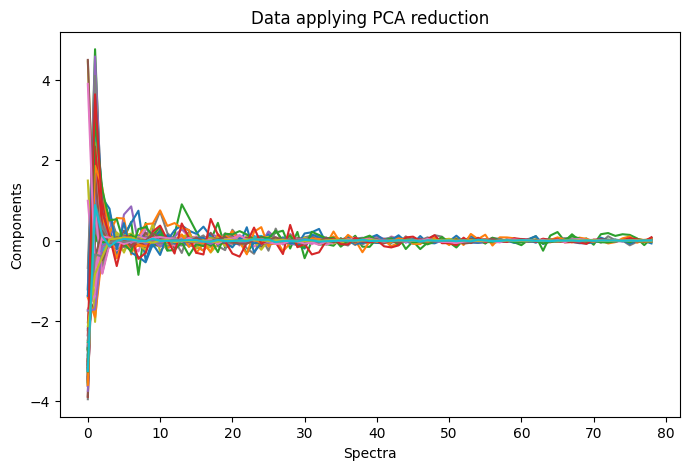

In [26]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Spectra")
plt.ylabel("Components")
plt.plot(pca_transformed_data_t.iloc[:,:100])
plt.show()

In [19]:
original_data = pca_data.inverse_transform(pca_transformed)
original_data

array([[0.56762464, 0.46920952, 0.41721267, ..., 0.62638577, 0.67930174,
        3.        ],
       [0.35748096, 0.31103912, 0.26749117, ..., 0.58058496, 0.60838987,
        3.        ],
       [0.31263004, 0.30797003, 0.25504944, ..., 0.60707267, 0.63655327,
        3.        ],
       ...,
       [0.14945911, 0.09938022, 0.08728518, ..., 0.98119232, 1.00034043,
        3.        ],
       [0.23184083, 0.16748972, 0.09852083, ..., 0.98507808, 1.00457279,
        3.        ],
       [0.24303012, 0.19992049, 0.19376464, ..., 0.86266742, 0.89453269,
        3.        ]])

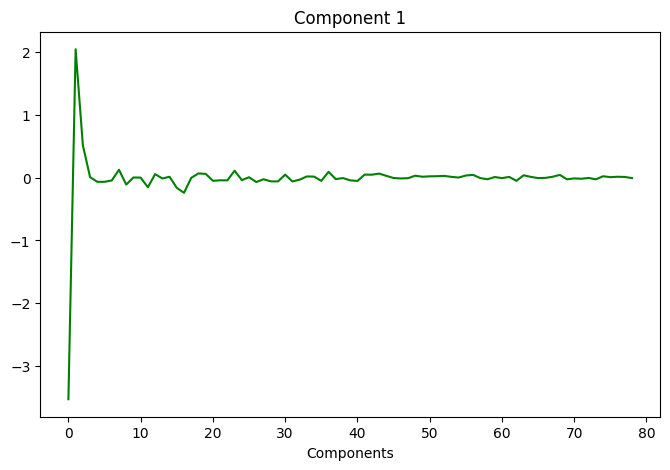

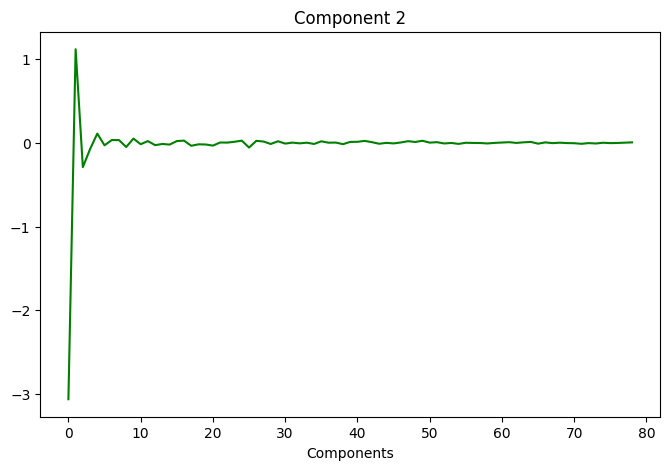

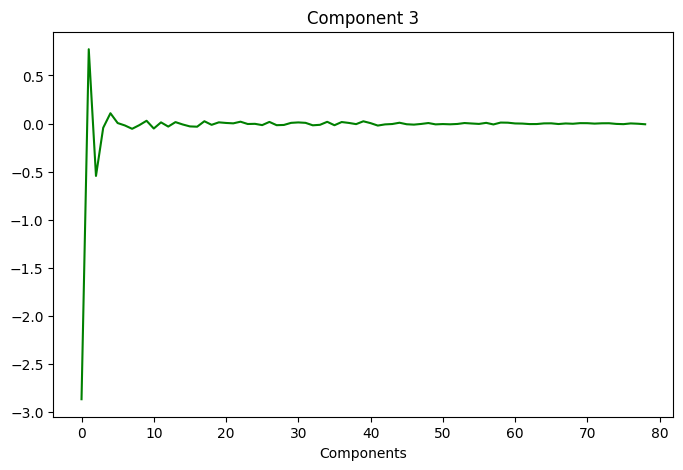

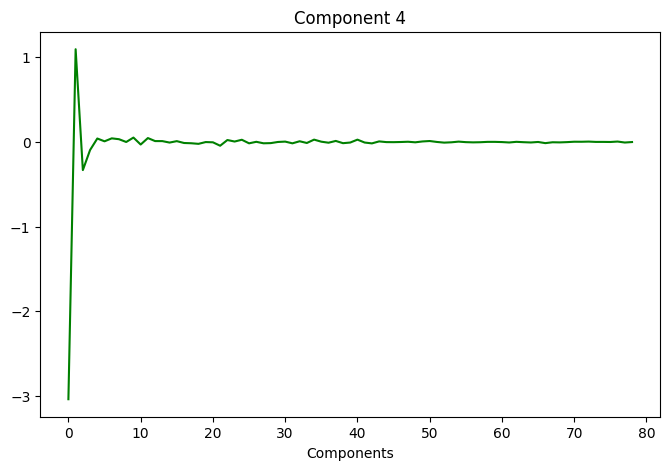

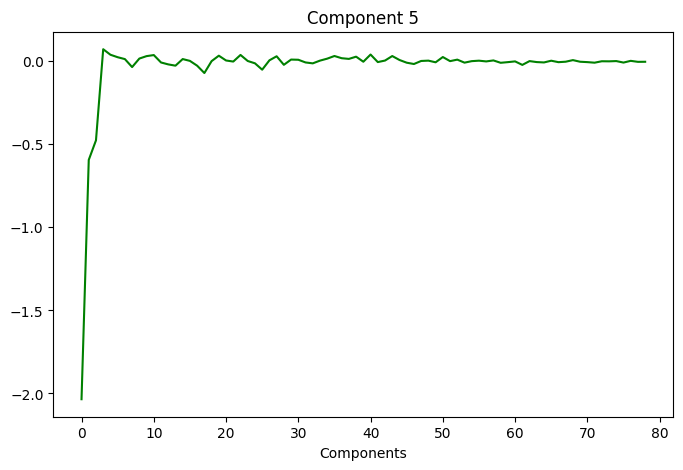

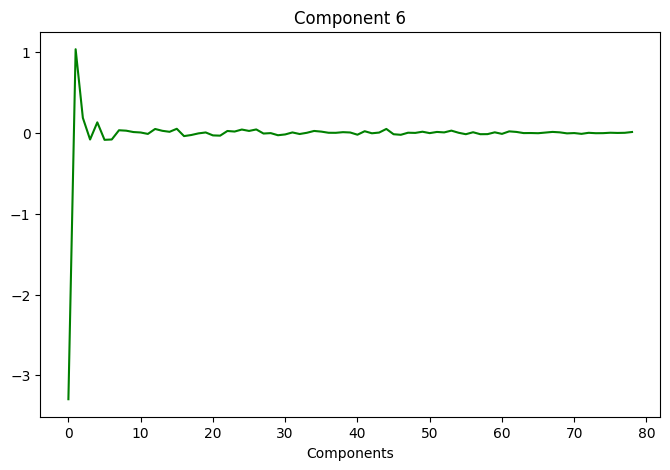

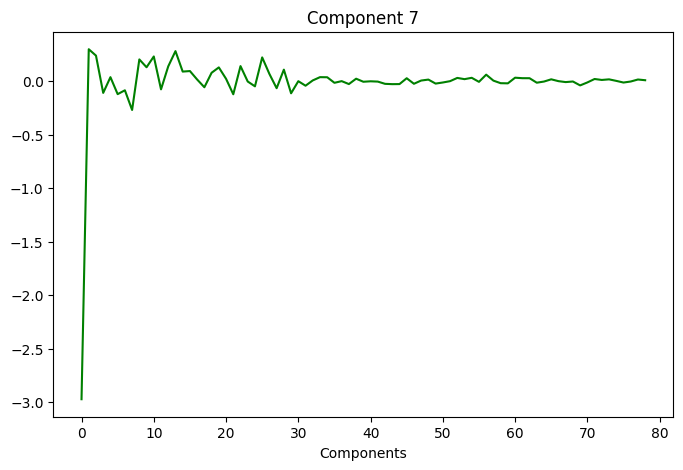

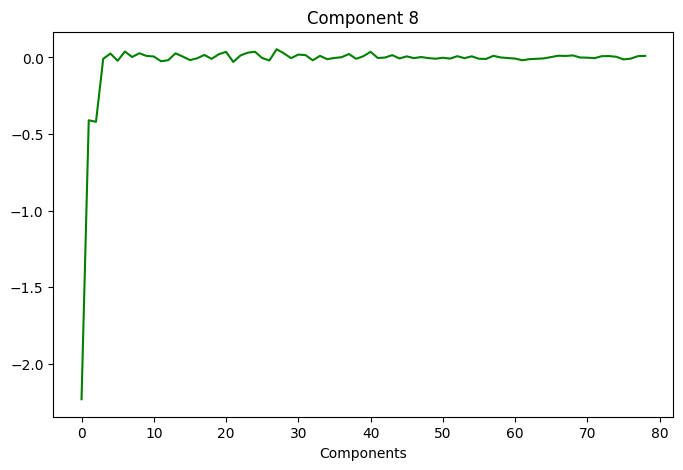

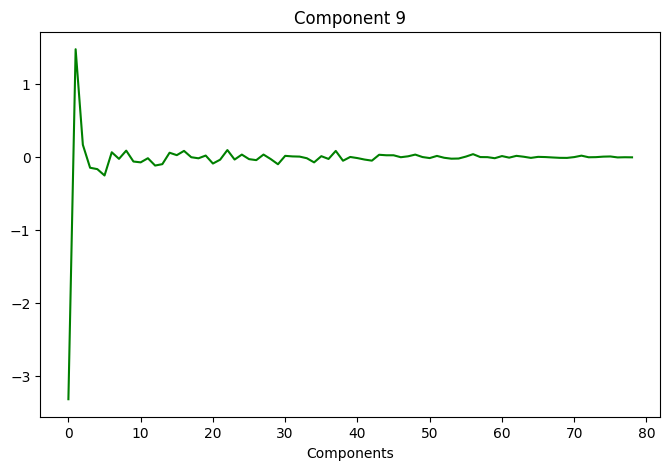

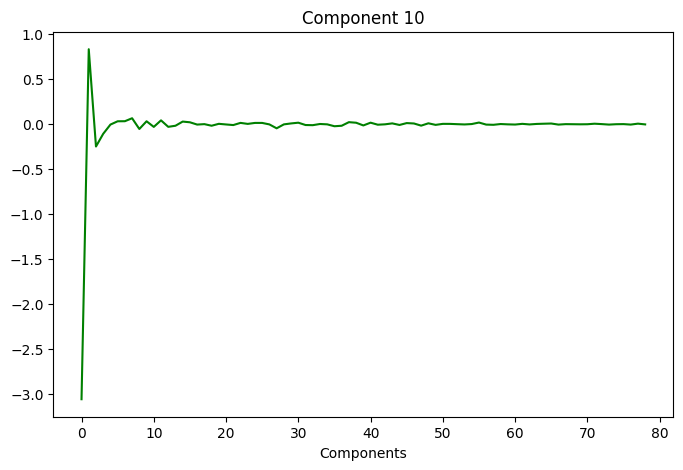

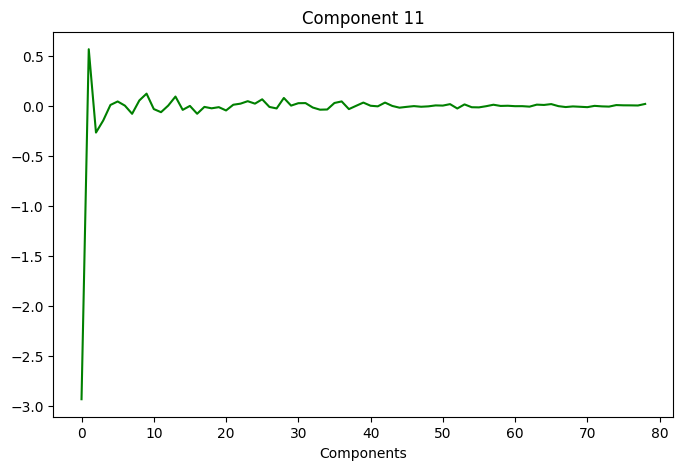

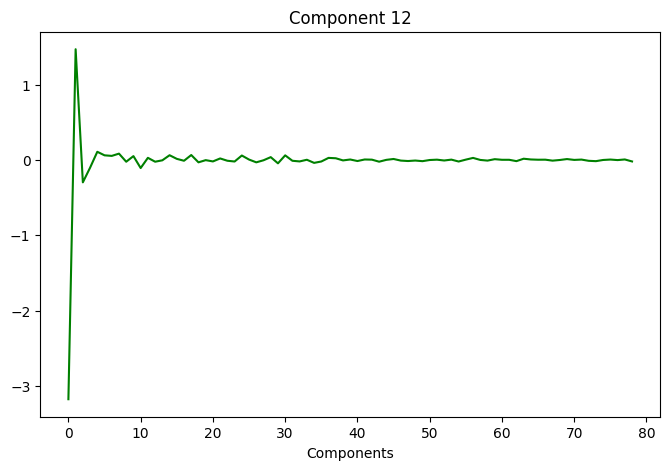

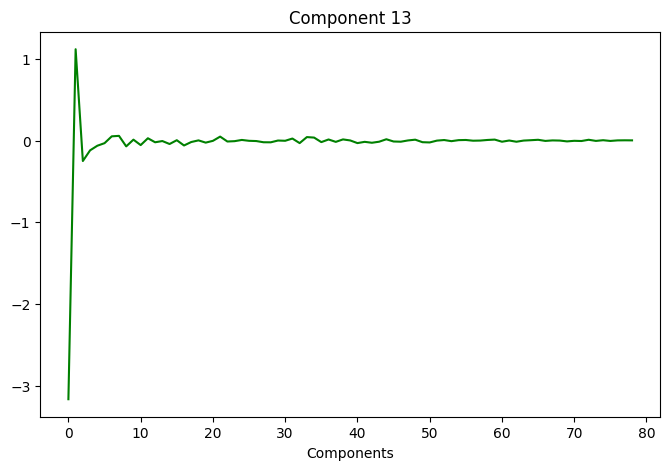

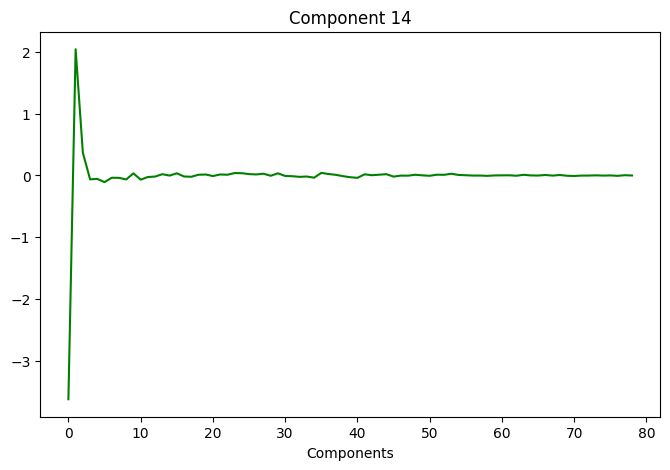

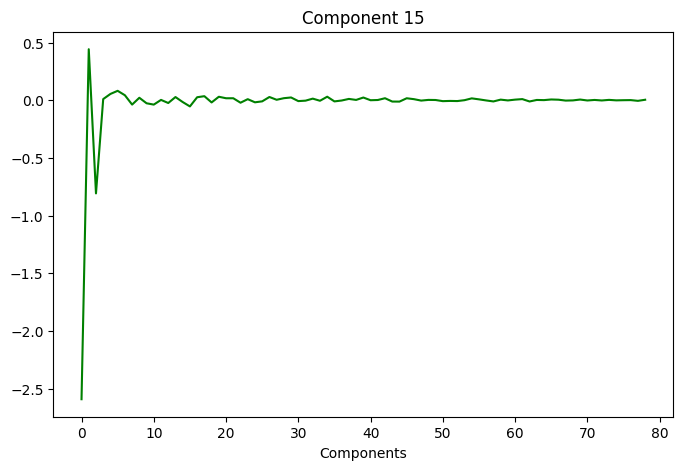

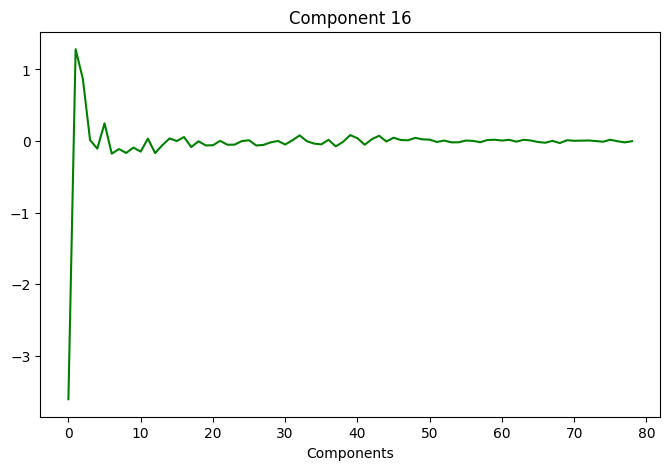

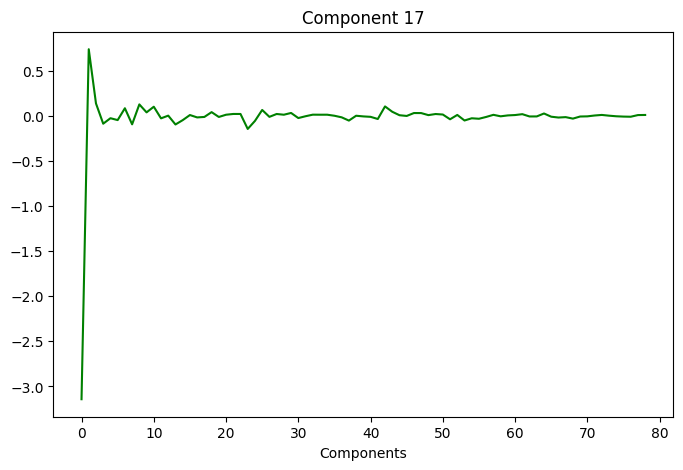

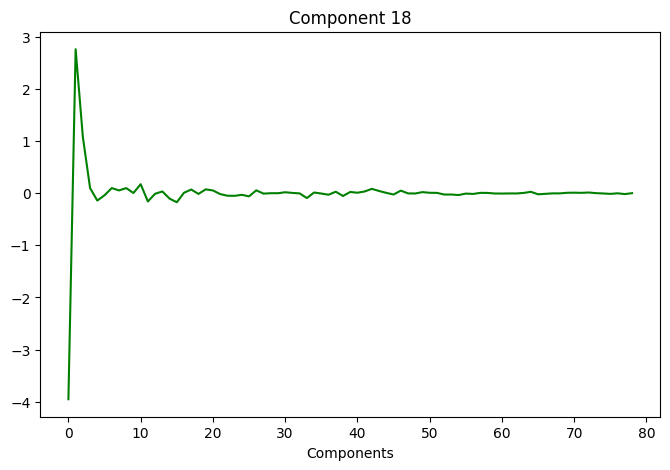

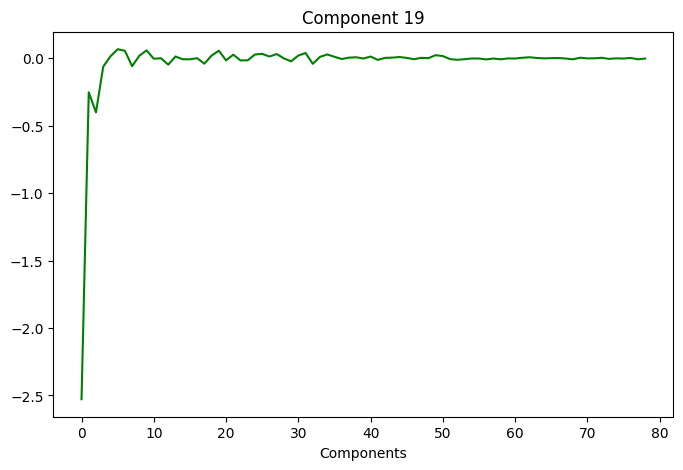

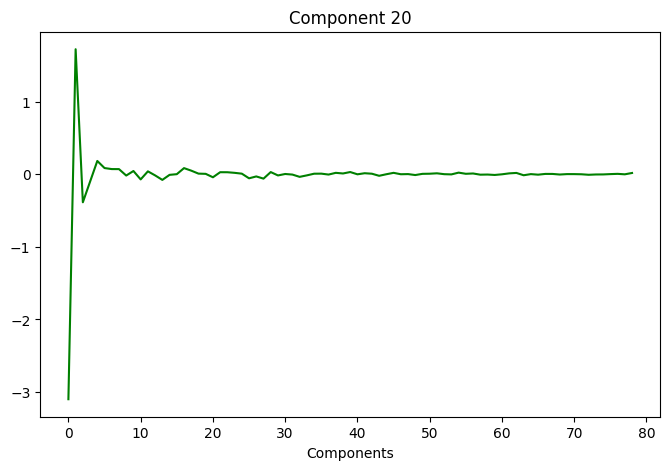

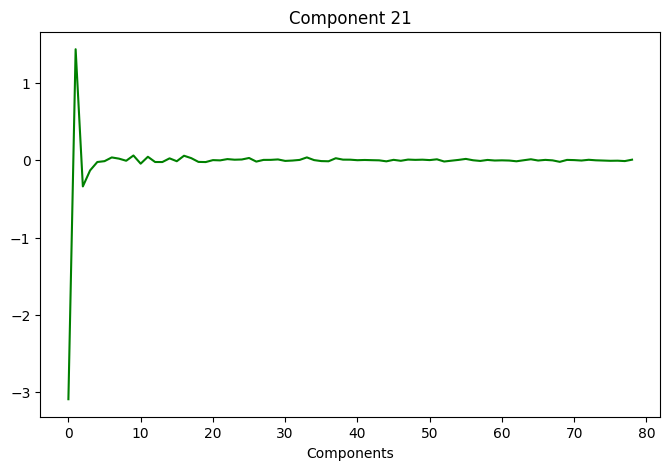

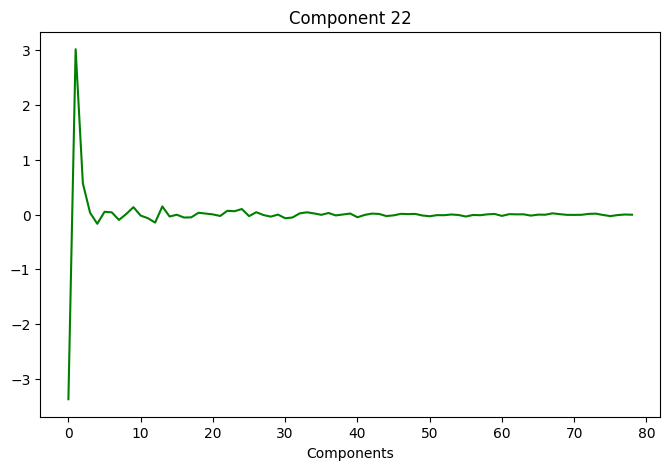

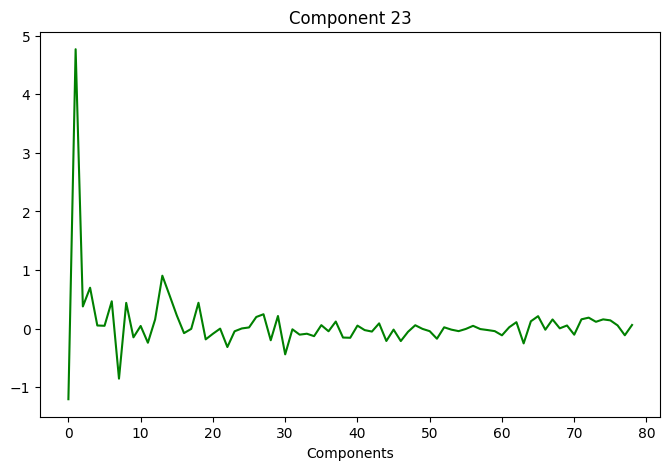

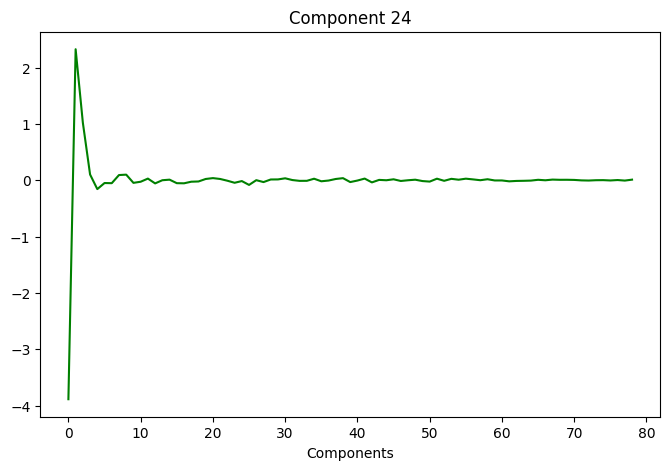

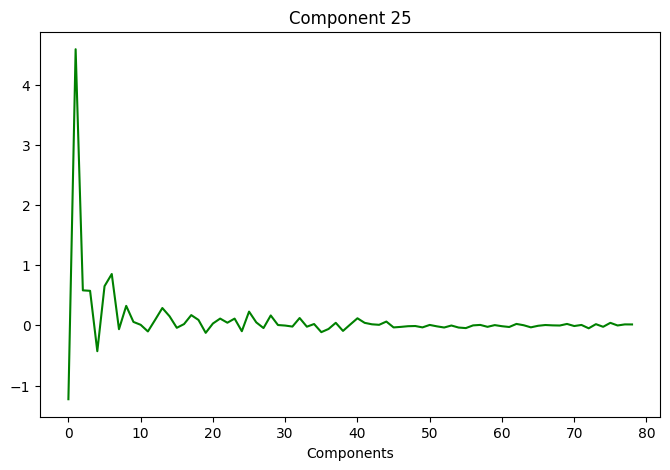

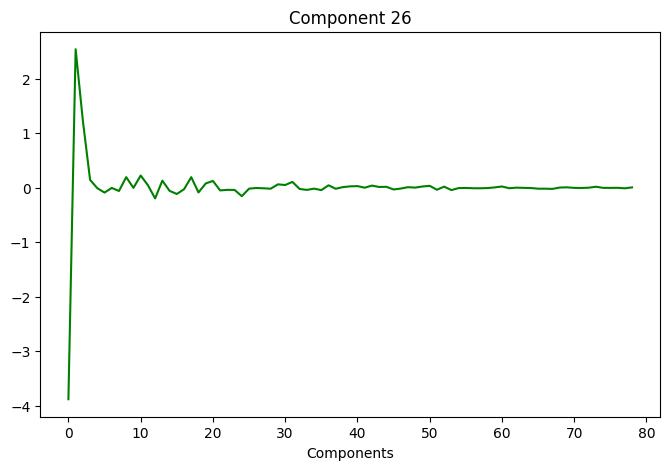

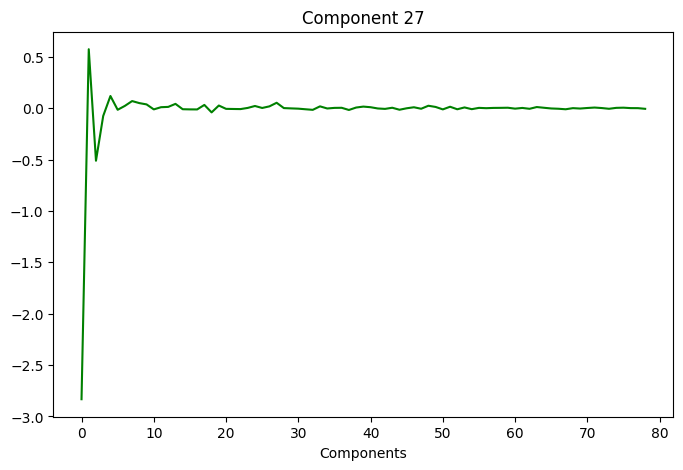

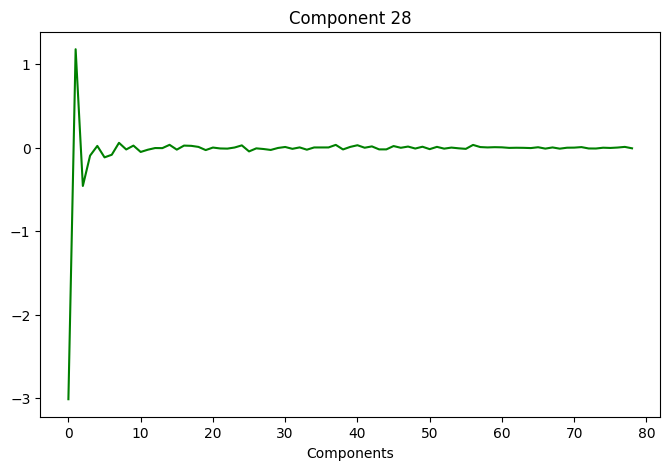

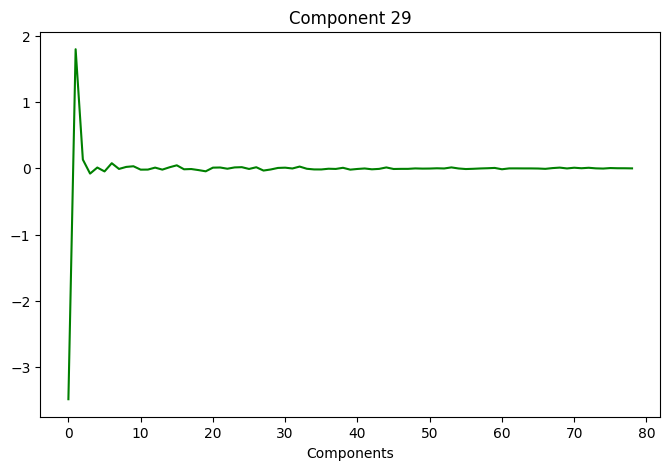

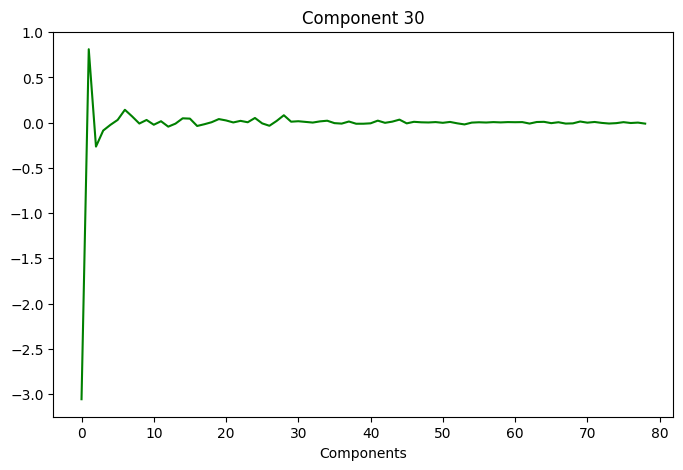

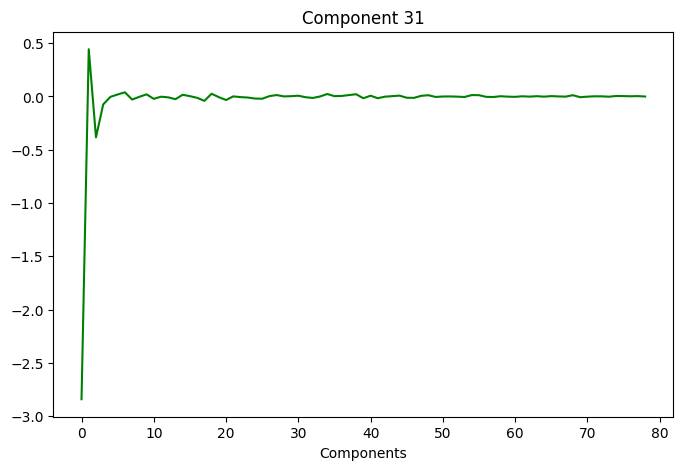

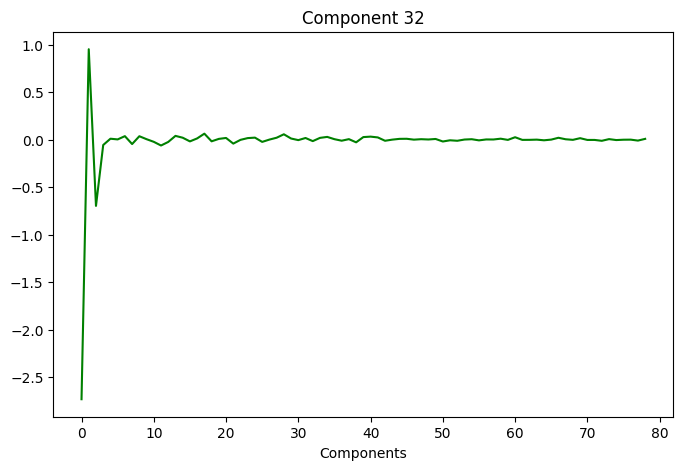

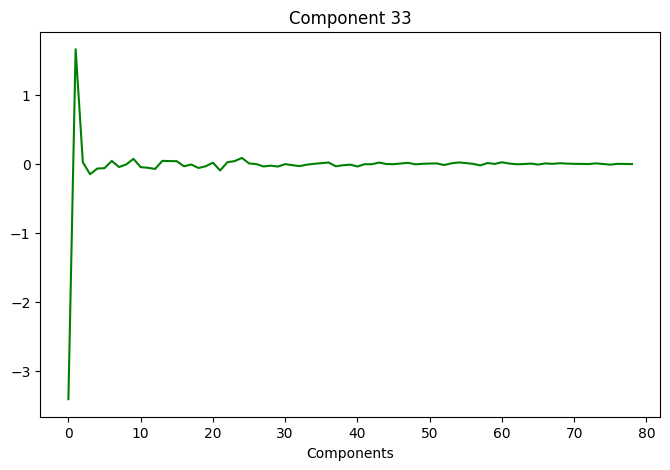

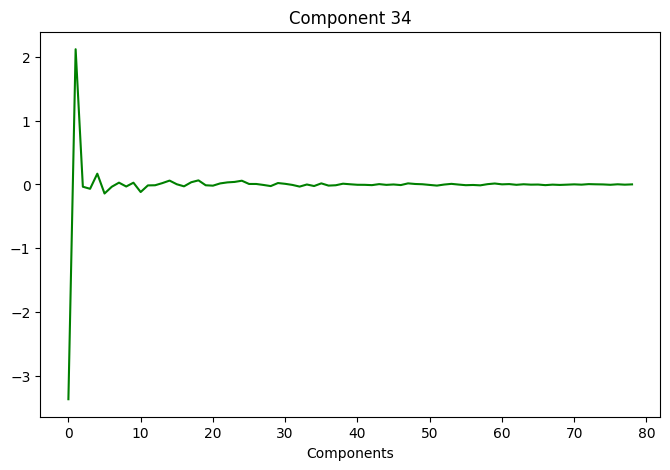

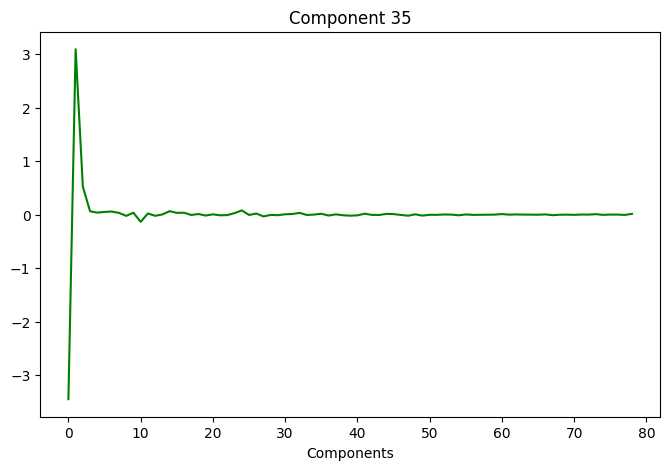

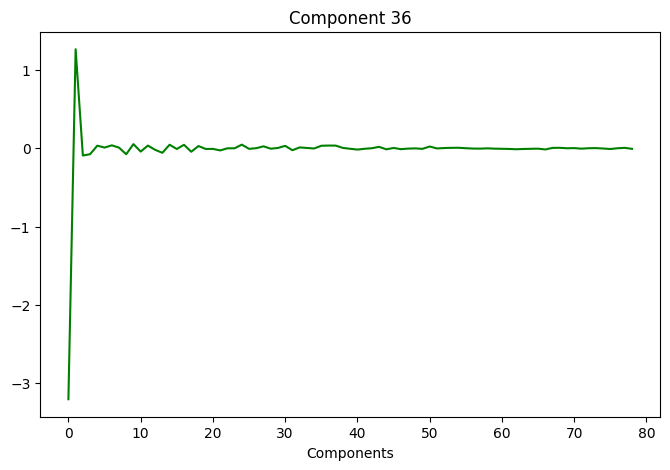

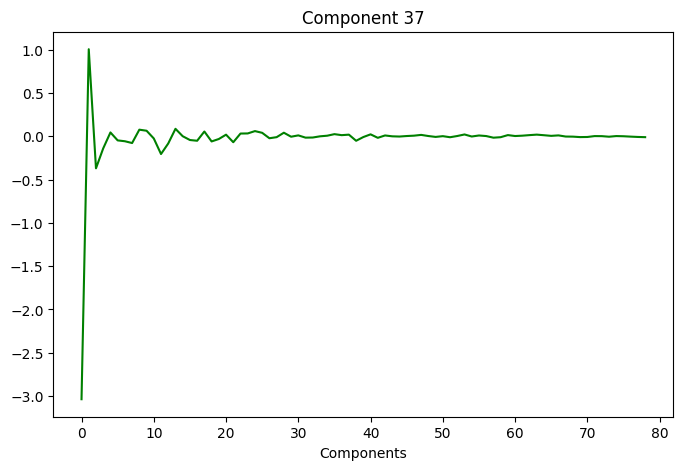

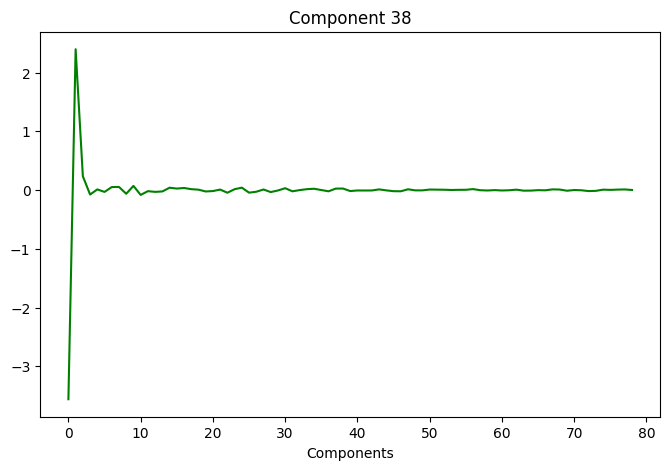

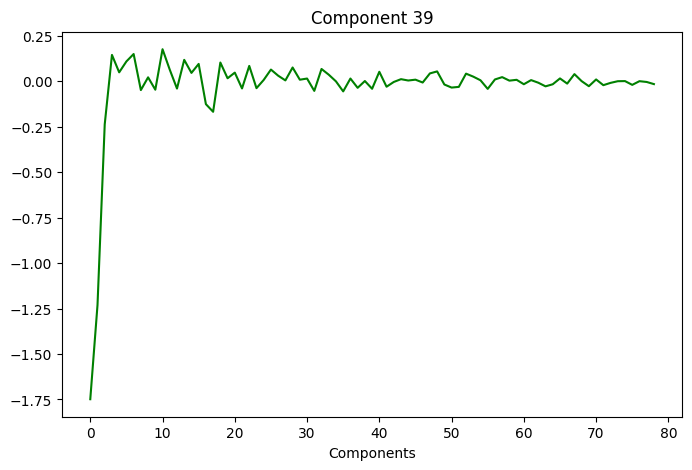

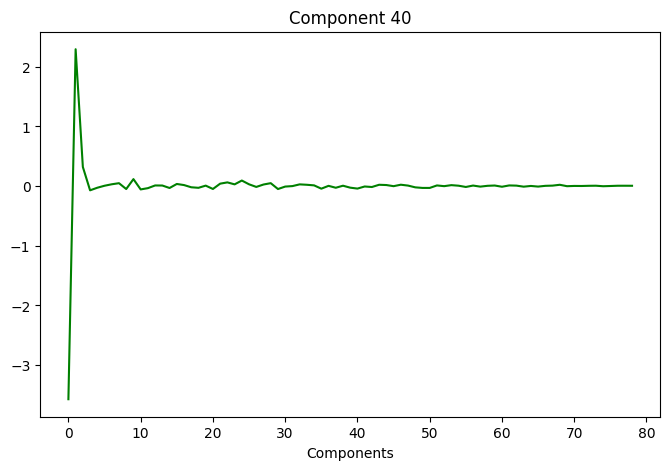

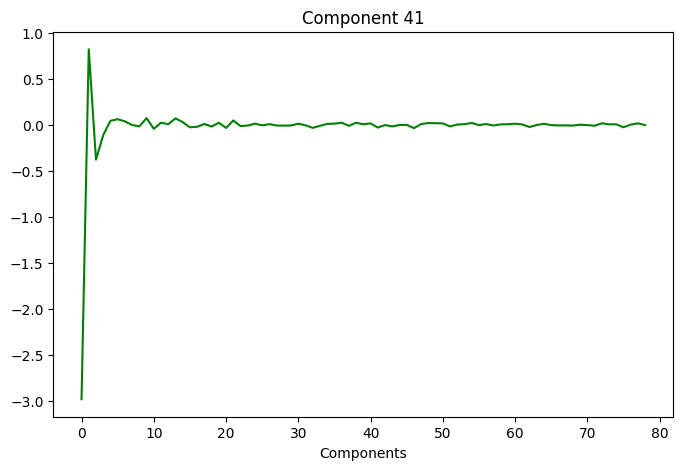

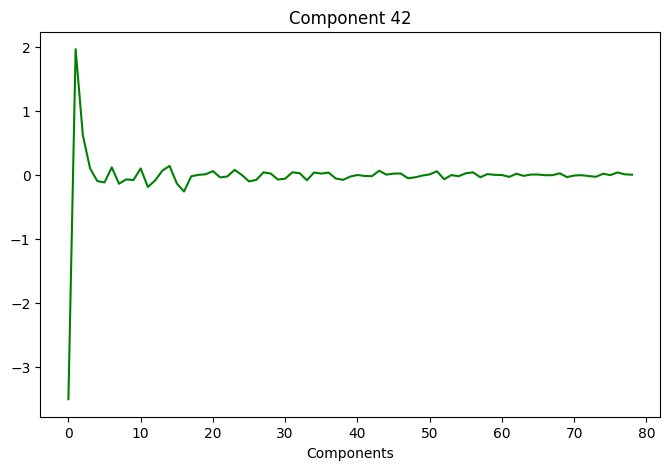

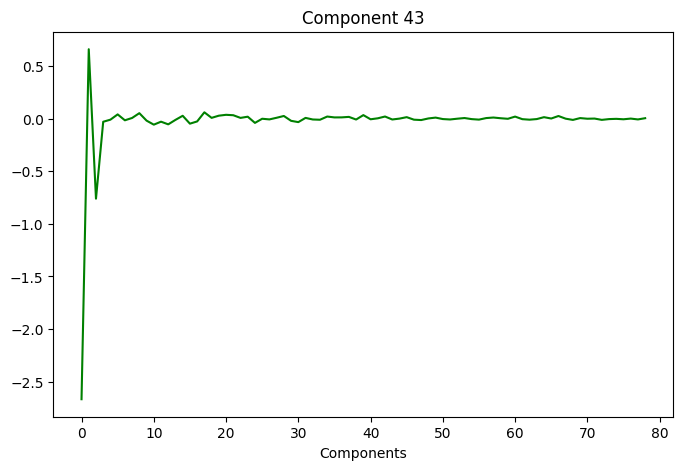

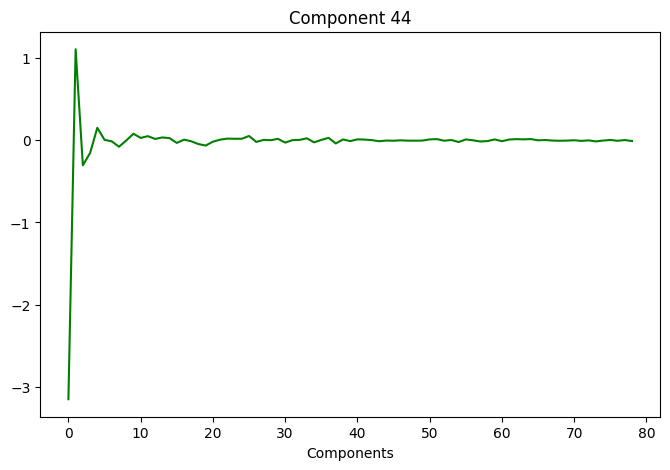

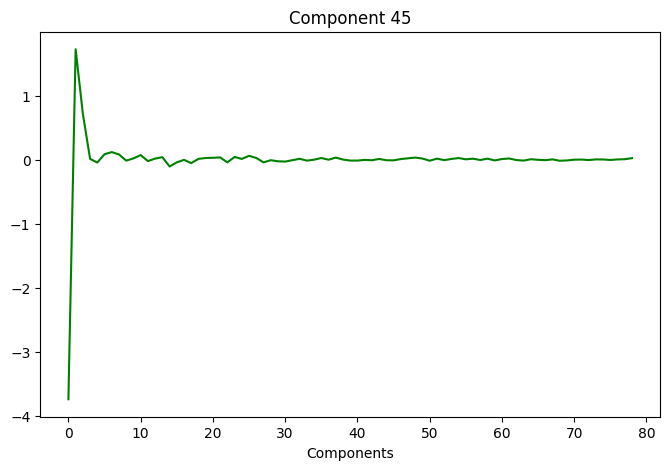

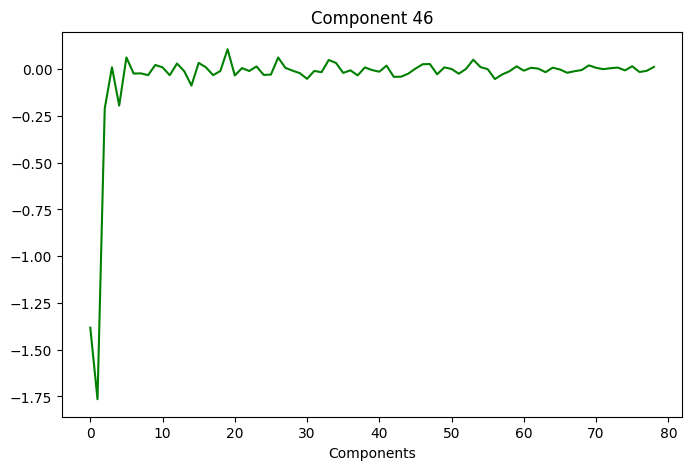

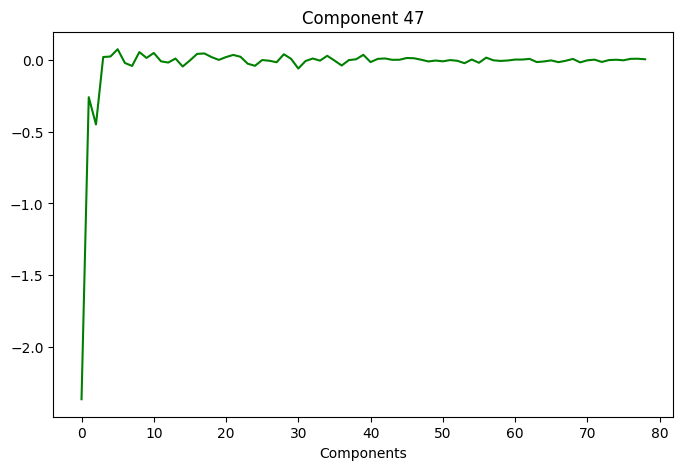

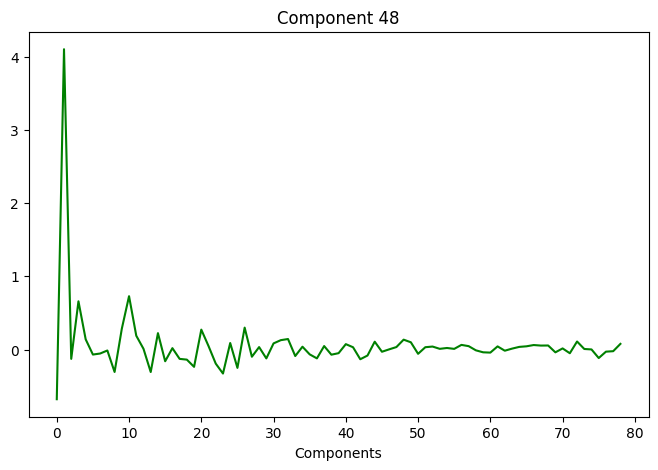

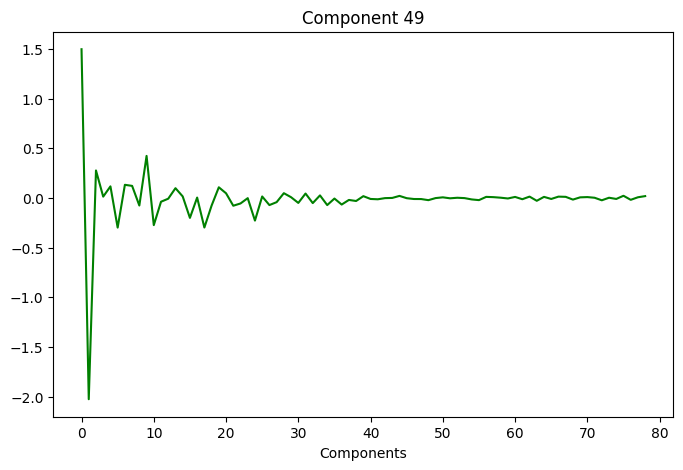

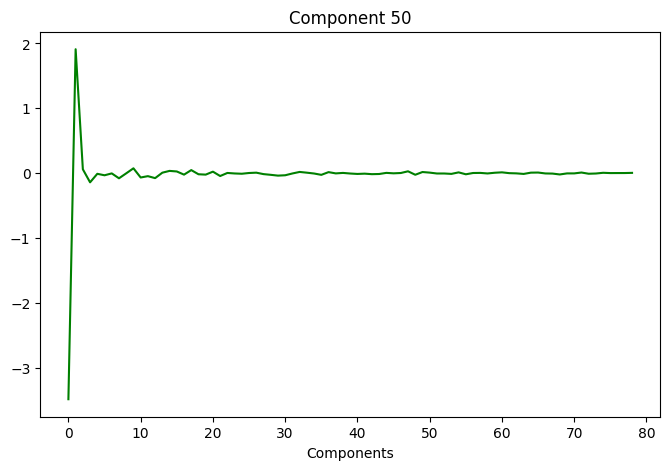

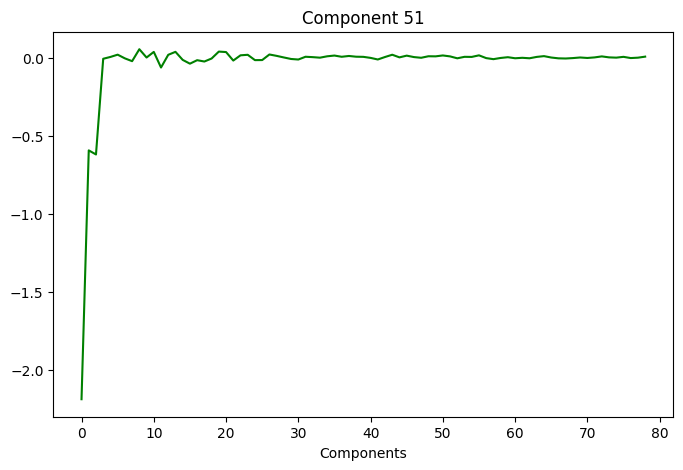

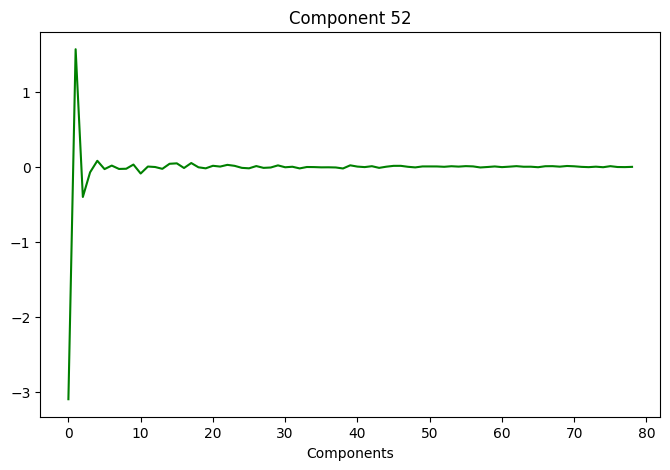

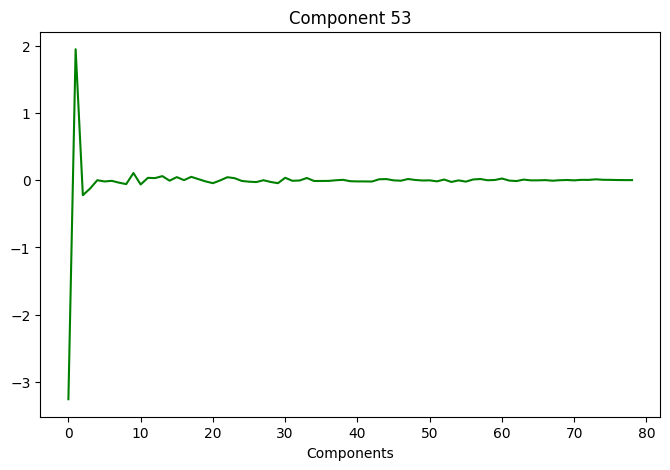

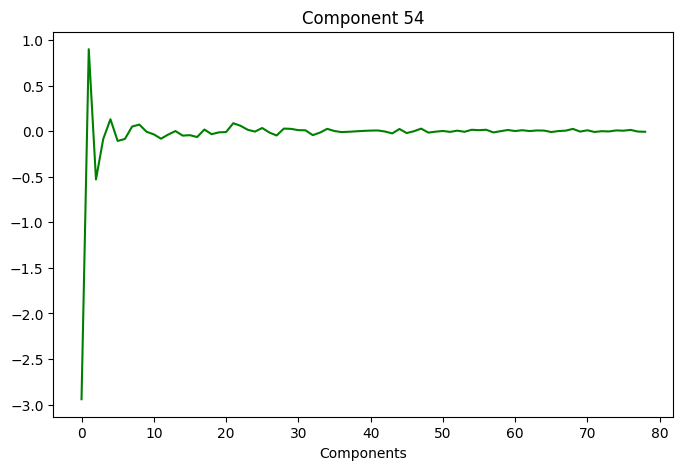

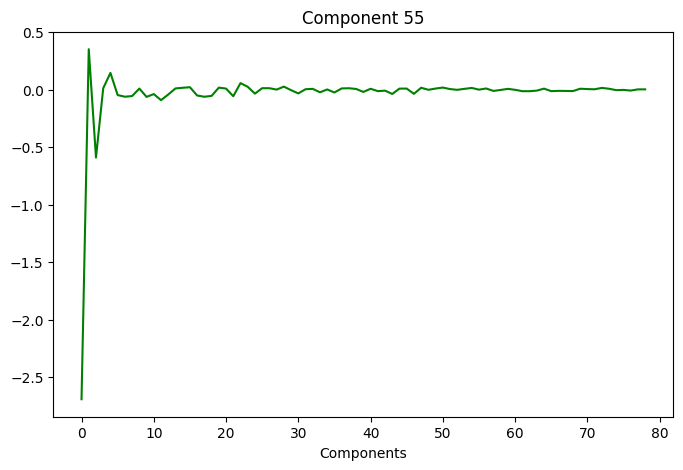

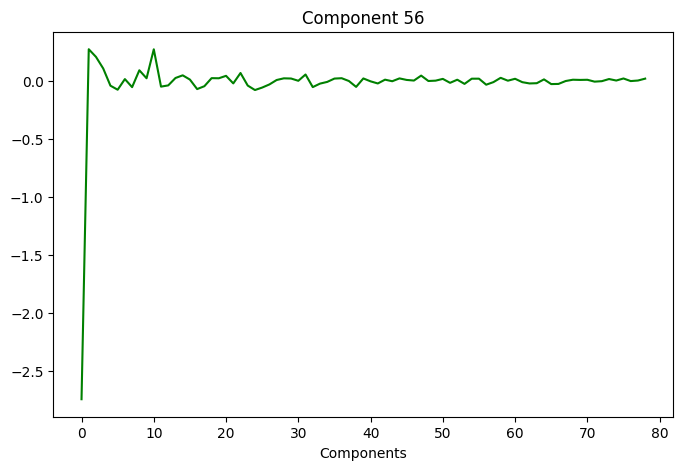

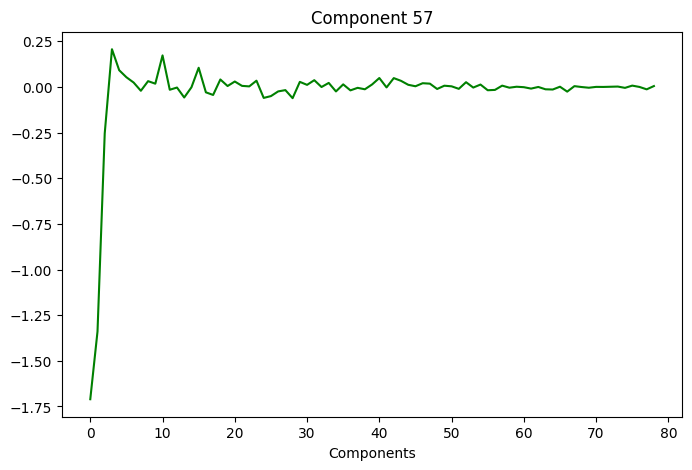

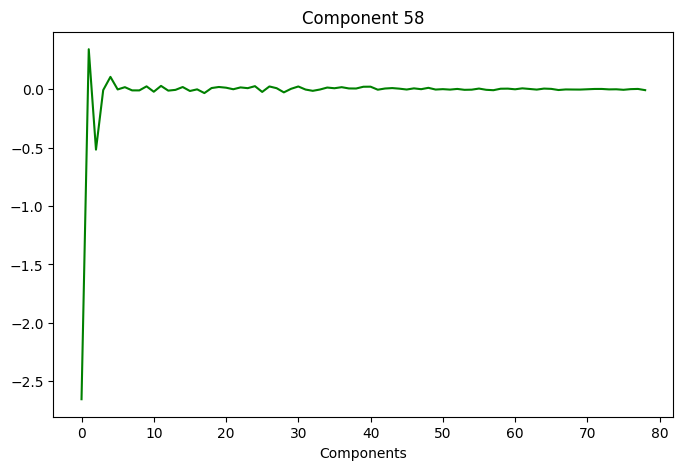

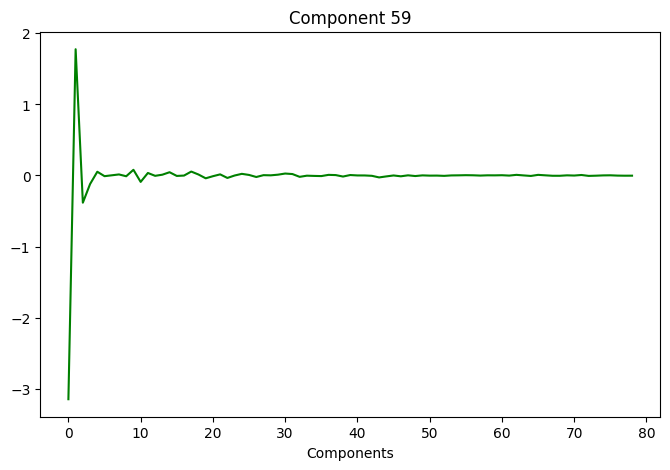

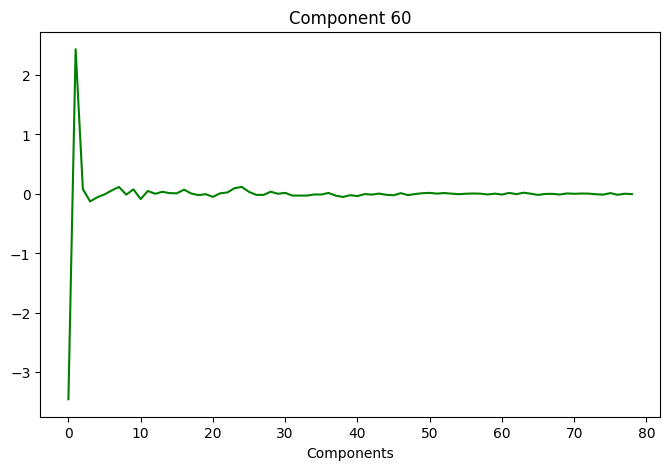

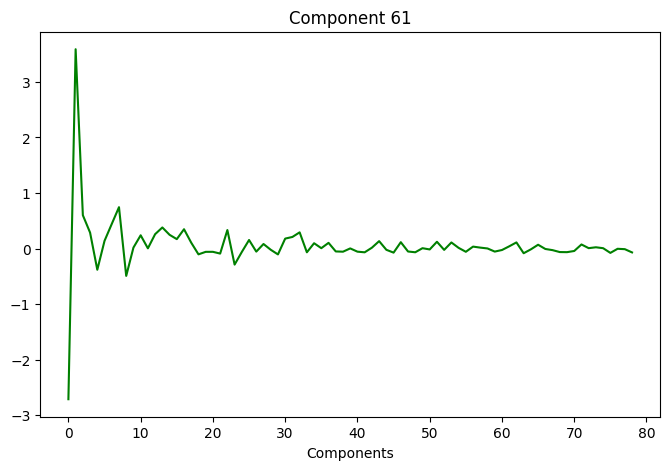

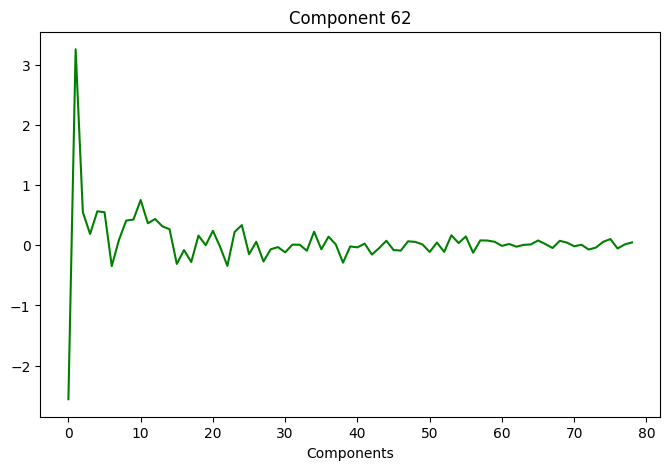

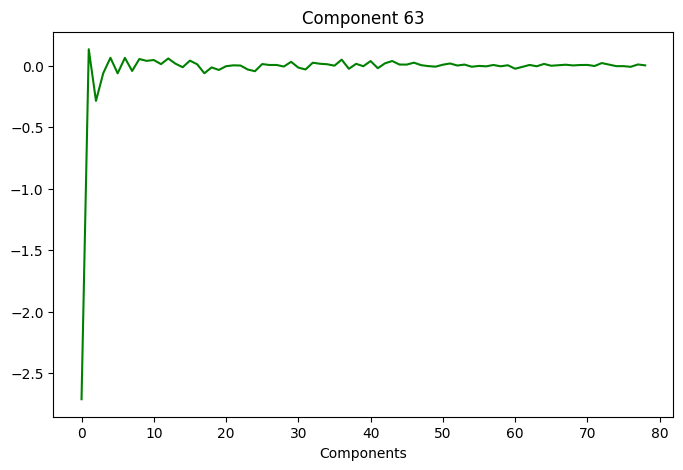

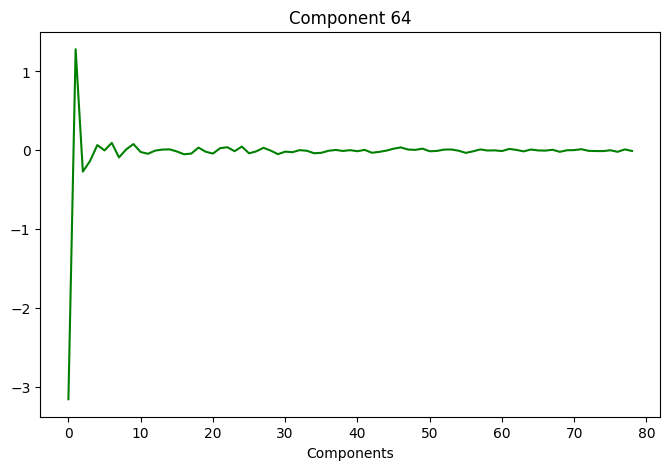

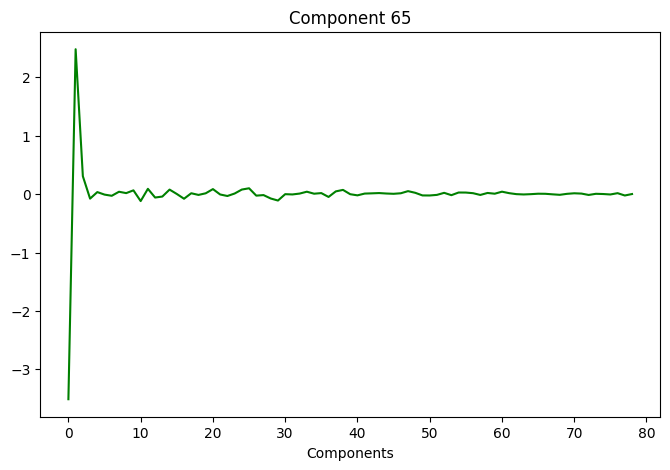

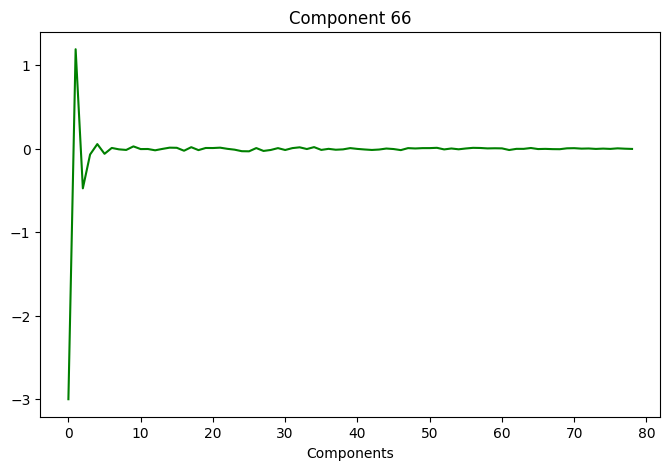

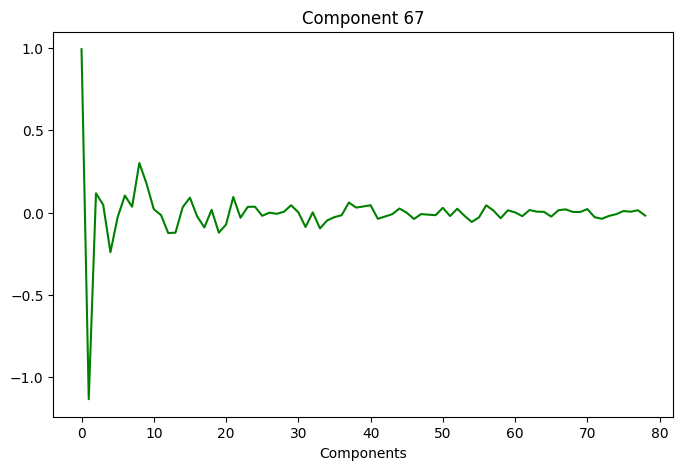

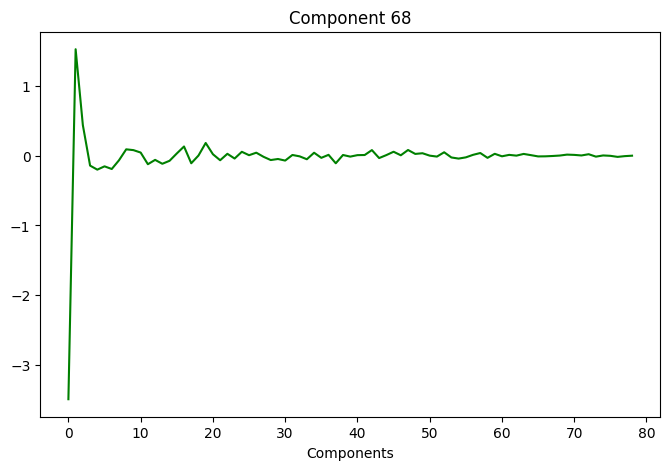

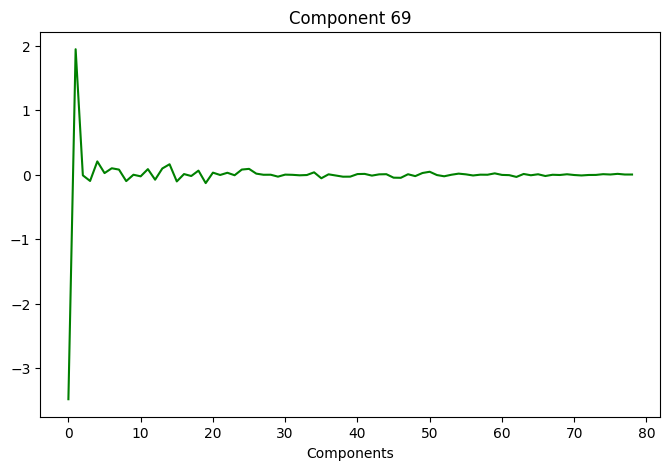

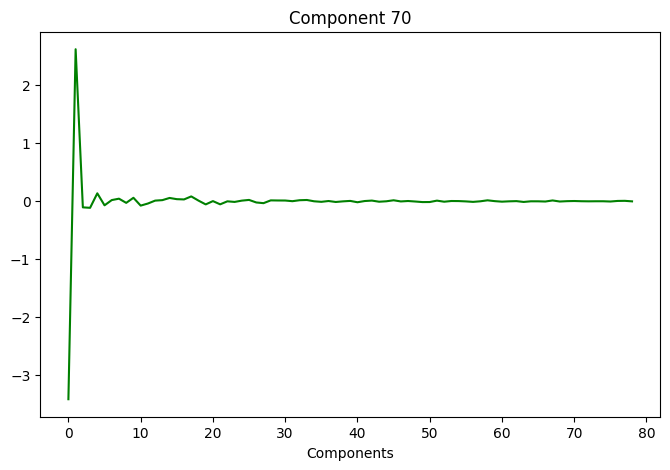

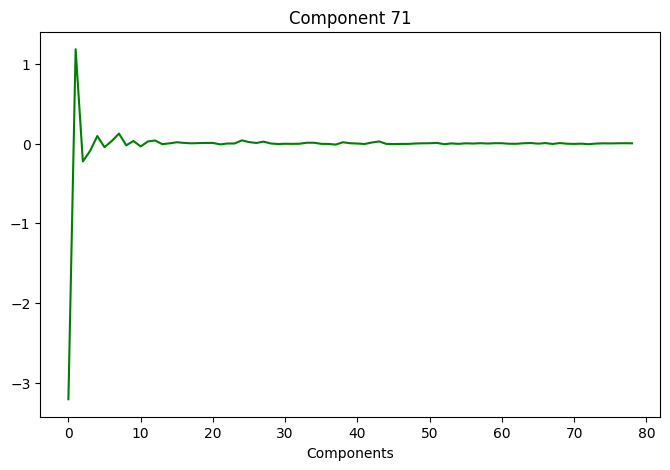

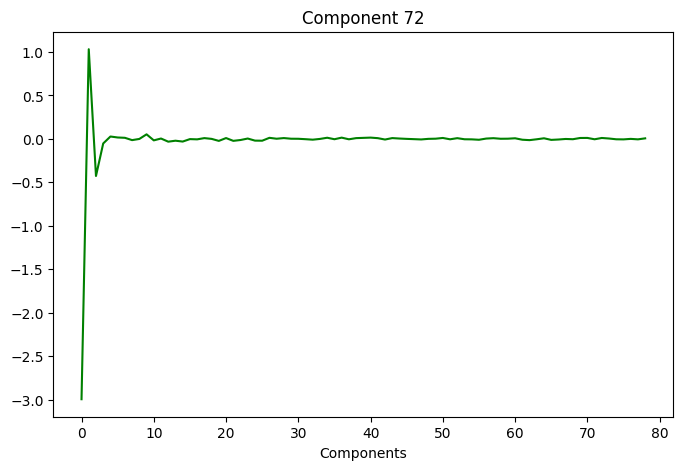

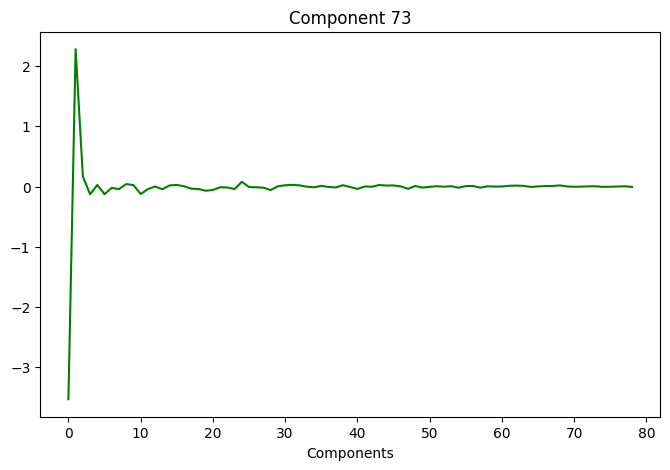

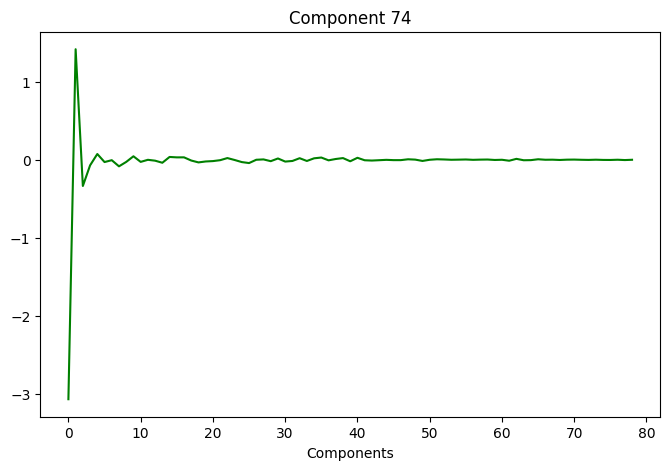

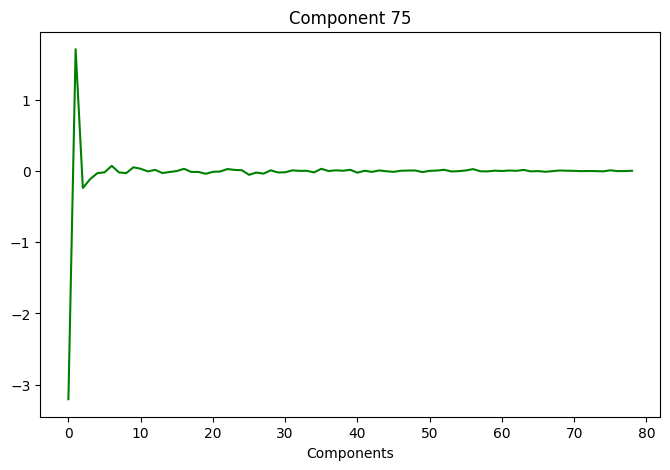

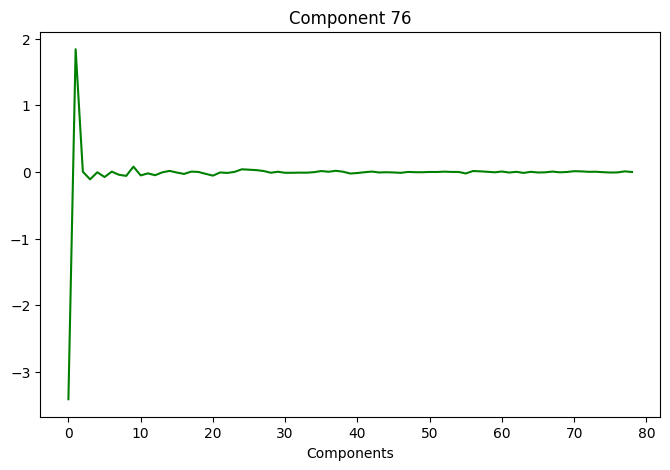

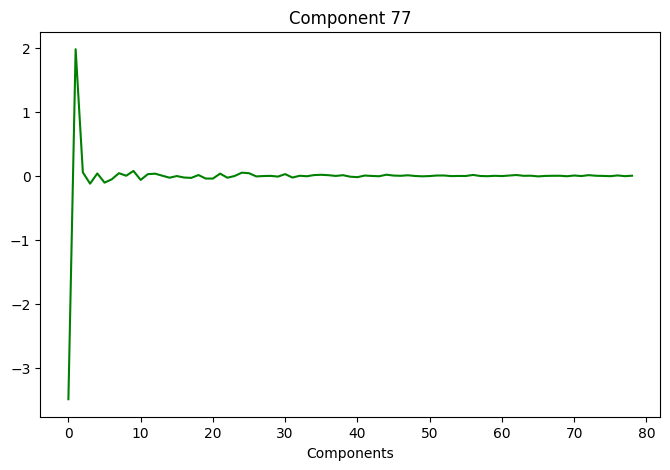

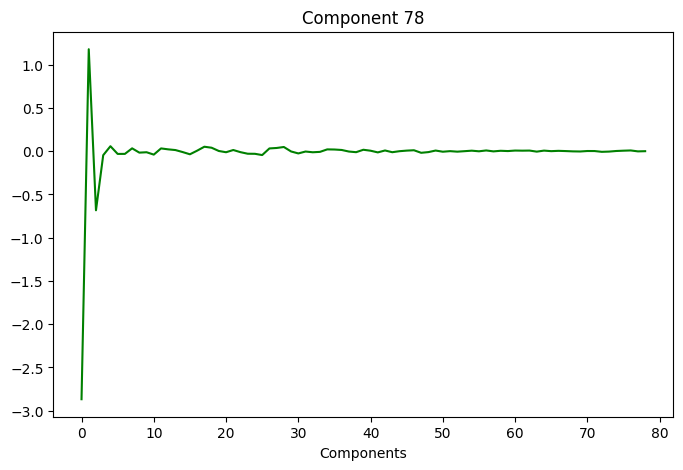

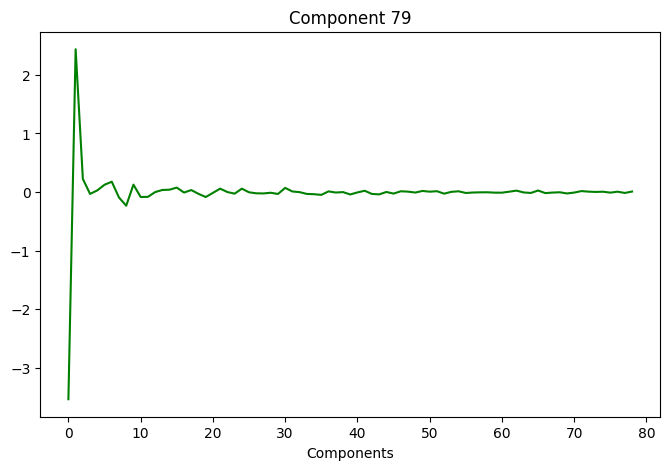

In [27]:
for i in range(1,80):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Components")
    plt.plot(pca_transformed_data_t.iloc[:,i-1:i], '-',markersize=1, color = "g")
    plt.show()

In [28]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=80, n_neighbors=500)
lle_transformed = lle.fit_transform(data)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [29]:
lle_transformed_data

0         1         2         3         4         5         6   \
0     -0.010094  0.013972  0.009261  0.005606  0.002506  0.004462  0.000235   
1     -0.006792  0.005637 -0.010027  0.005586  0.002311  0.001298  0.004964   
2     -0.005538  0.002565 -0.016304  0.004596  0.000960 -0.000789  0.001825   
3     -0.006601  0.005284 -0.011327  0.005748  0.003057  0.001738  0.000028   
4     -0.004357 -0.005162 -0.011235 -0.003745 -0.009839 -0.011793  0.004697   
...         ...       ...       ...       ...       ...       ...       ...   
12116 -0.003499 -0.012127  0.000600 -0.008908 -0.002911 -0.000338  0.005779   
12117  0.002560 -0.007709  0.006821  0.003351  0.003930  0.003894  0.007295   
12118  0.001518 -0.010303  0.006264  0.002709 -0.001993  0.007937  0.009241   
12119 -0.000638 -0.008461  0.008570 -0.001825  0.008672  0.006642  0.004888   
12120 -0.005481 -0.006463 -0.002162 -0.008635  0.005011 -0.004731 -0.010576   

             7         8         9   ...        70        71        72  \
0     -0.012726  0.007699 -0.005336  ... -0.001911  0.000767  0.008572   
1      0.000127 -0.007718  0.001393  ...  0.010284 -0.014387 -0.004042   
2      0.003264 -0.004872  0.000767  ... -0.005333 -0.010582 -0.001724   
3      0.003395 -0.001635  0.004628  ...  0.014142 -0.016648  0.003605   
4     -0.009549  0.001305  0.005023  ... -0.007615  0.016503  0.003122   
...         ...       ...       ...  ...       ...       ...       ...   
12116 -0.002477  0.004821  0.000573  ...  0.003709 -0.000116 -0.007245   
12117  0.010064  0.000964 -0.002864  ... -0.004385 -0.007164  0.004621   
12118  0.006286  0.004519 -0.000741  ... -0.000731 -0.003548  0.008216   
12119  0.010427 -0.001913 -0.002577  ... -0.017434 -0.014882 -0.014246   
12120  0.005440  0.000645 -0.006571  ...  0.001095  0.002300  0.010545   

             73        74        75        76        77        78        79  
0      0.007008  0.011288  0.024505  0.002950  0.011374 -0.017359  0.012939  
1     -0.008392  0.005634 -0.014778  0.005784 -0.007502  0.012160  0.005257  
2     -0.003776 -0.000963 -0.008505 -0.002384 -0.009311  0.001109 -0.010006  
3     -0.003030  0.001161 -0.016193  0.006392  0.000872  0.010228 -0.000365  
4      0.004618 -0.011255  0.010558 -0.004034  0.000679  0.011549  0.000538  
...         ...       ...       ...       ...       ...       ...       ...  
12116  0.003246 -0.017119 -0.006623 -0.003073  0.009148 -0.000375 -0.001936  
12117 -0.008633 -0.011392  0.001831  0.003950  0.001018  0.003041  0.007463  
12118 -0.005126 -0.001674 -0.002526 -0.002295  0.000764  0.010038  0.003491  
12119  0.012250  0.002021  0.001880  0.001614 -0.005266  0.020097  0.009731  
12120  0.003652  0.004978 -0.001915 -0.002278  0.001563  0.015866 -0.006148  

[12121 rows x 80 columns]

In [30]:
lle_transformed_data_t = lle_transformed_data.T

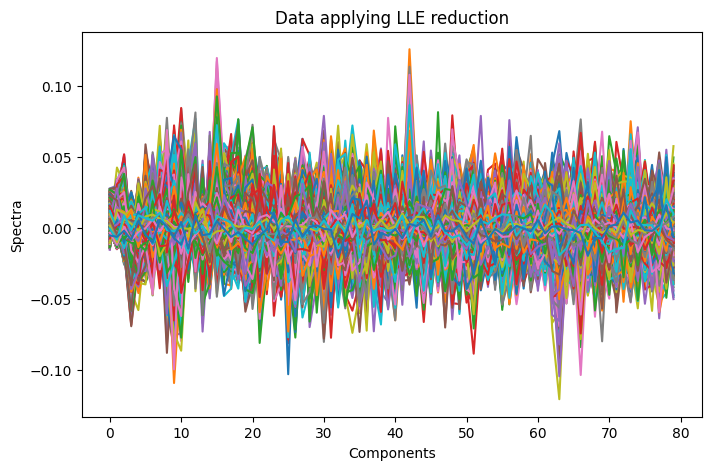

In [31]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Components")
plt.ylabel("Spectra")
plt.plot(lle_transformed_data_t)
plt.show()

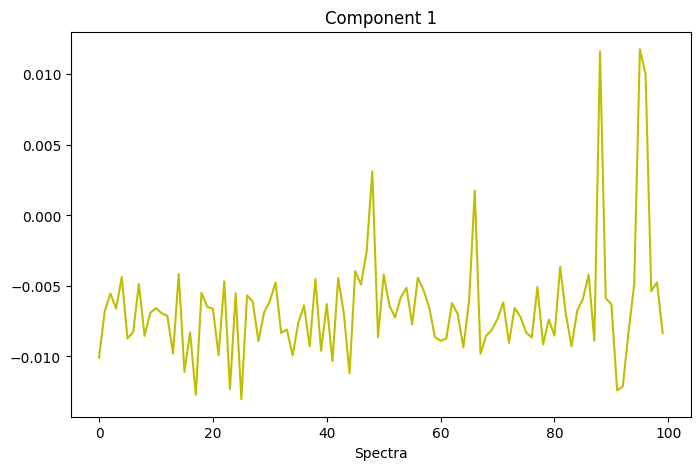

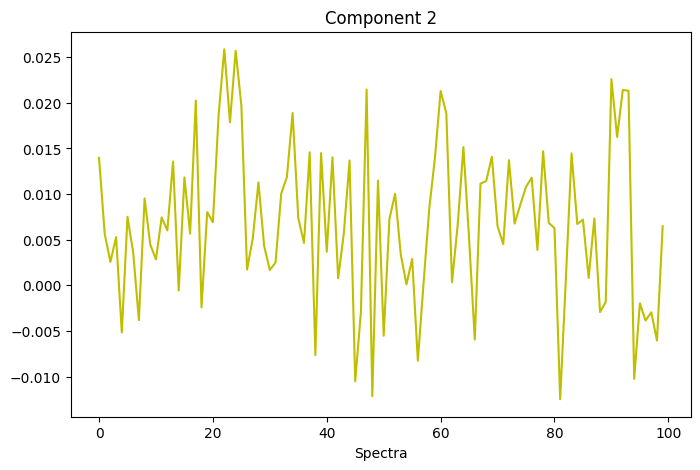

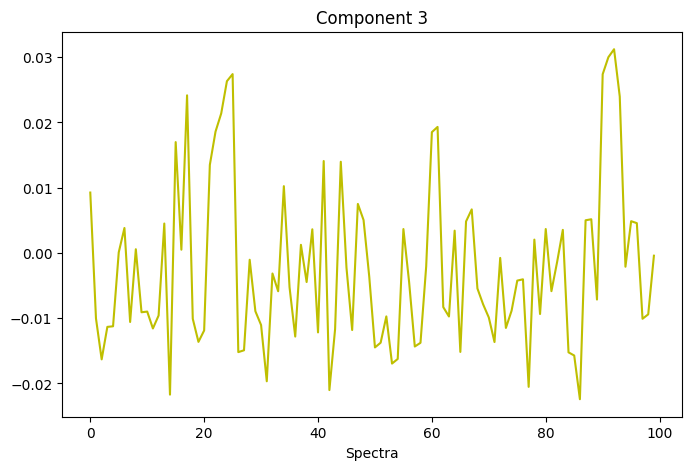

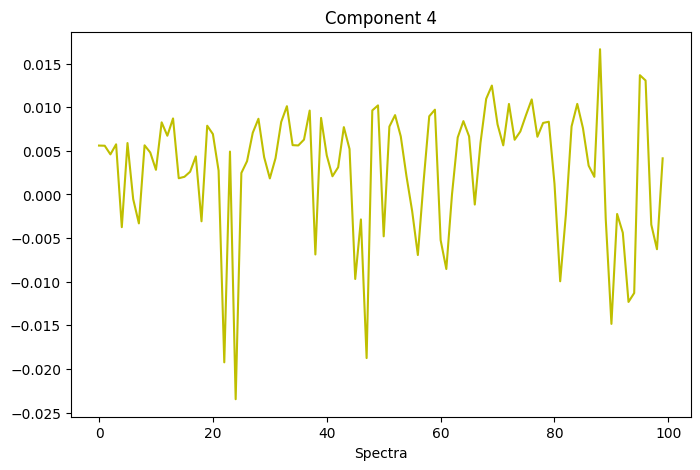

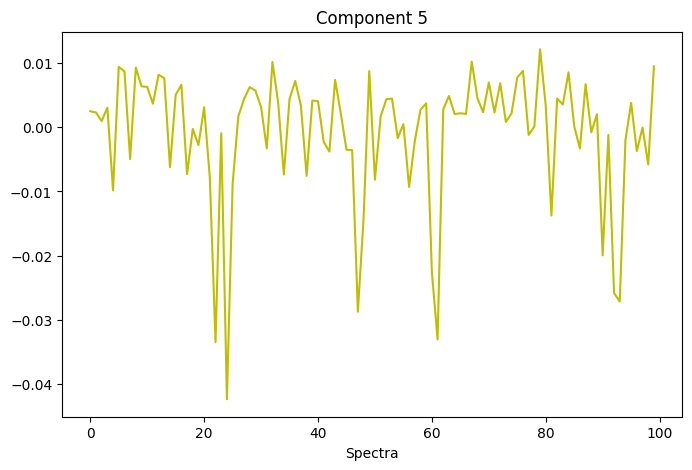

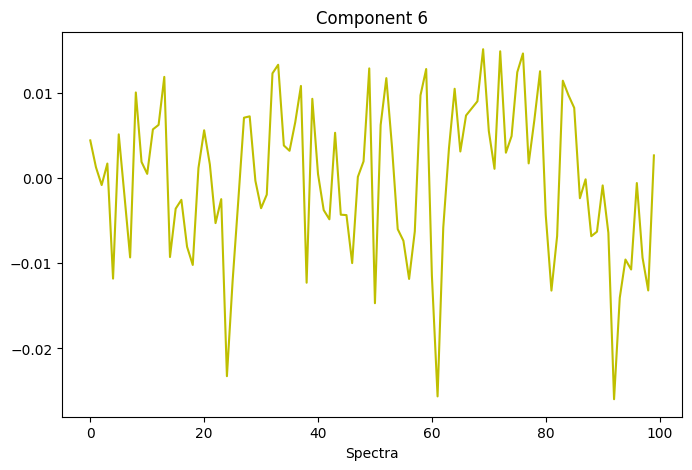

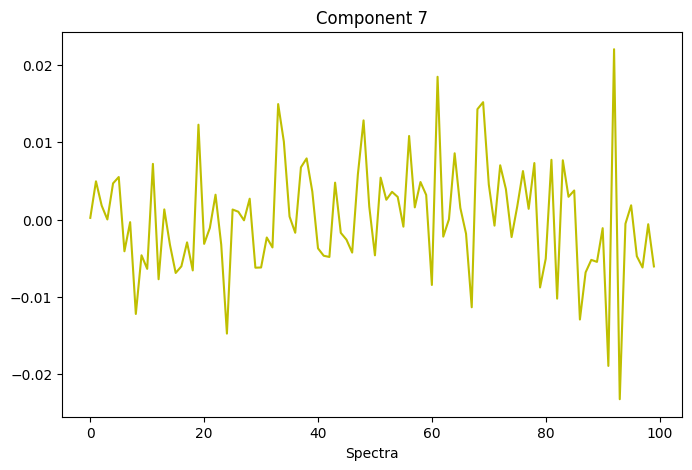

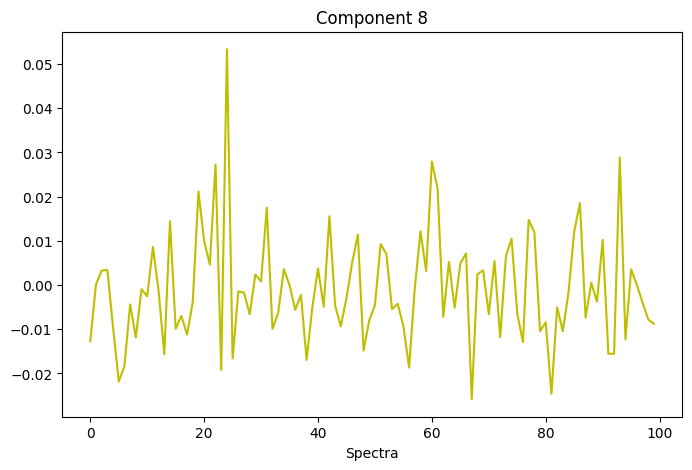

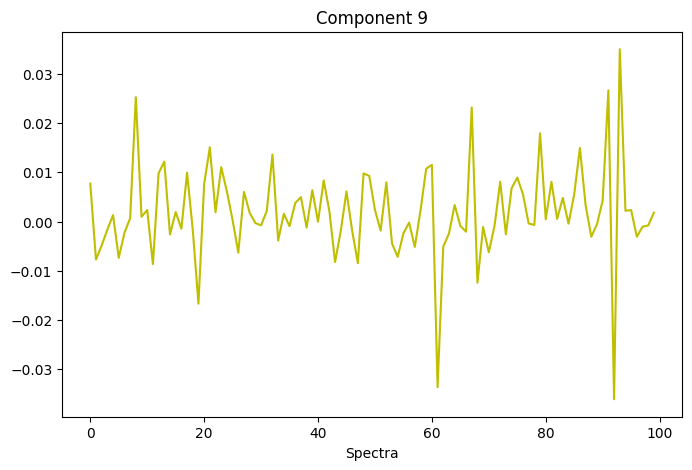

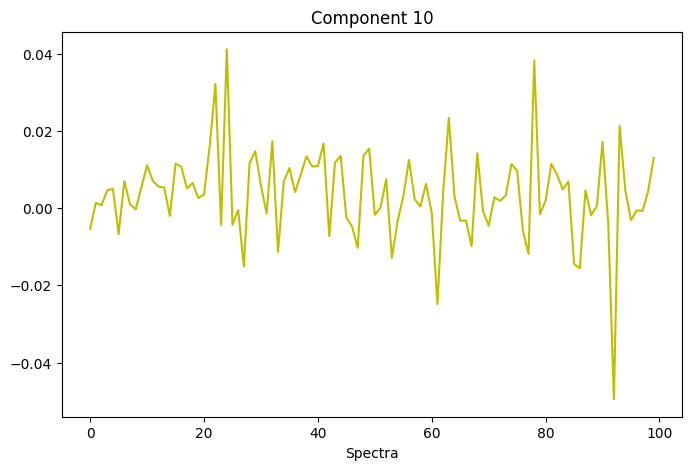

In [33]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Spectra")
    plt.plot(lle_transformed_data.iloc[:100, i-1:i], '-',markersize=1, color = "y")
    plt.show()

In [37]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=15, n_neighbors=140, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [38]:
hlle_transformed_data

0         1         2         3         4         5         6   \
0      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
1      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
2      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
3      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
4      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
...         ...       ...       ...       ...       ...       ...       ...   
12116  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12117  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12118  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12119  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12120  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   

             7         8         9        10        11            12  \
0     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
1     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
2     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
3     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
4     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
...         ...       ...       ...      ...       ...           ...   
12116 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12117 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12118 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12119 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12120 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   

             13       14  
0     -0.000191 -0.00016  
1     -0.000191 -0.00016  
2     -0.000191 -0.00016  
3     -0.000191 -0.00016  
4     -0.000191 -0.00016  
...         ...      ...  
12116 -0.000191 -0.00016  
12117 -0.000191 -0.00016  
12118 -0.000191 -0.00016  
12119 -0.000191 -0.00016  
12120 -0.000191 -0.00016  

[12121 rows x 15 columns]

In [41]:
hlle_transformed_data_t = hlle_transformed_data.T

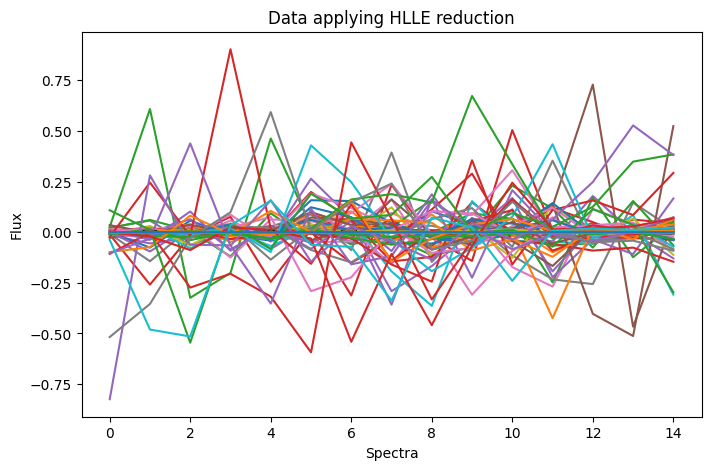

In [42]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(hlle_transformed_data_t)
plt.show()

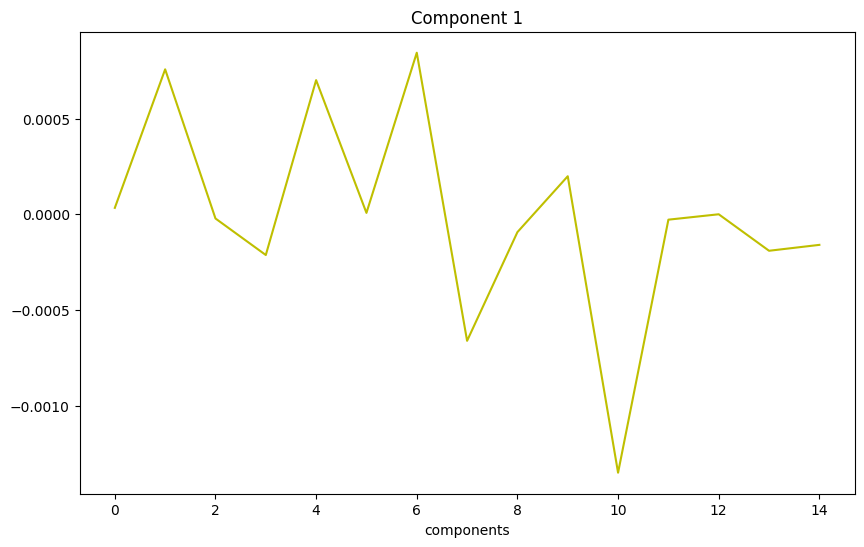

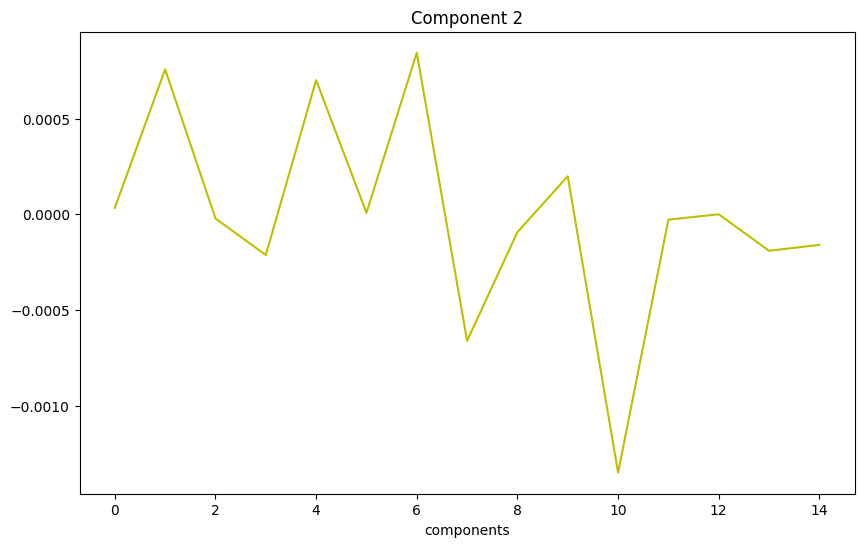

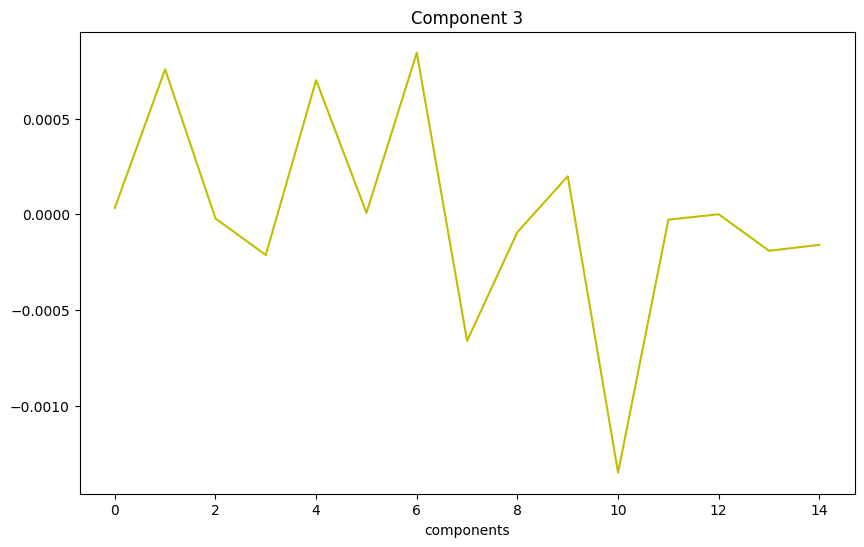

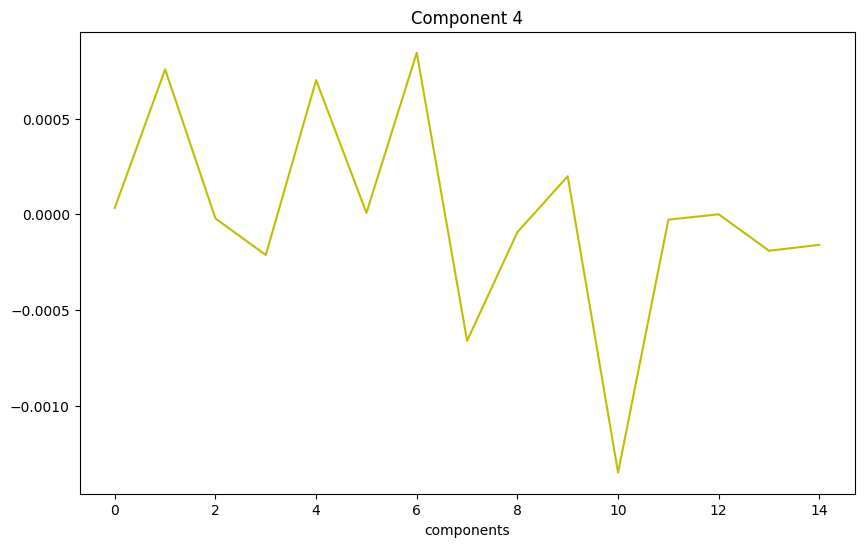

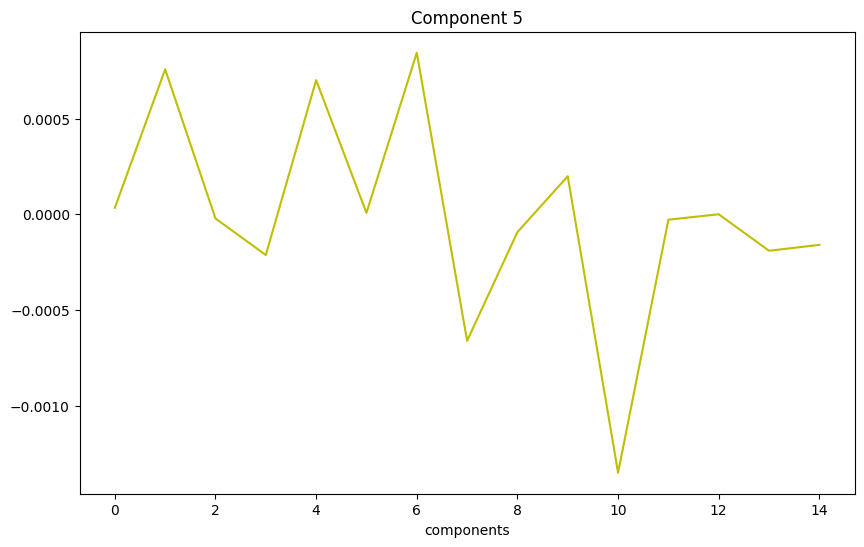

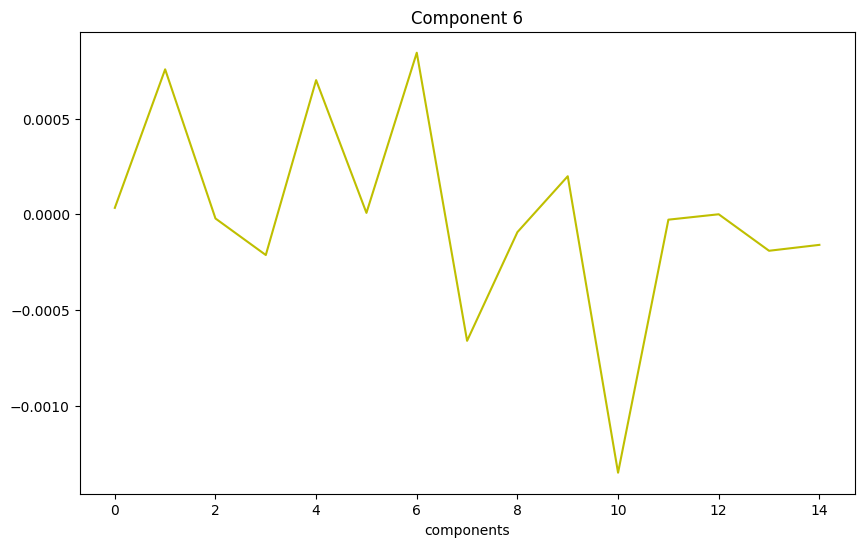

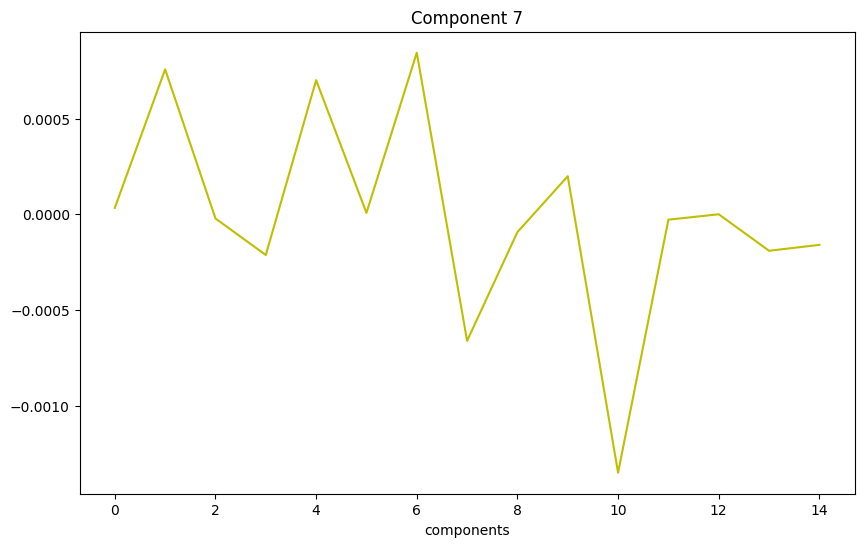

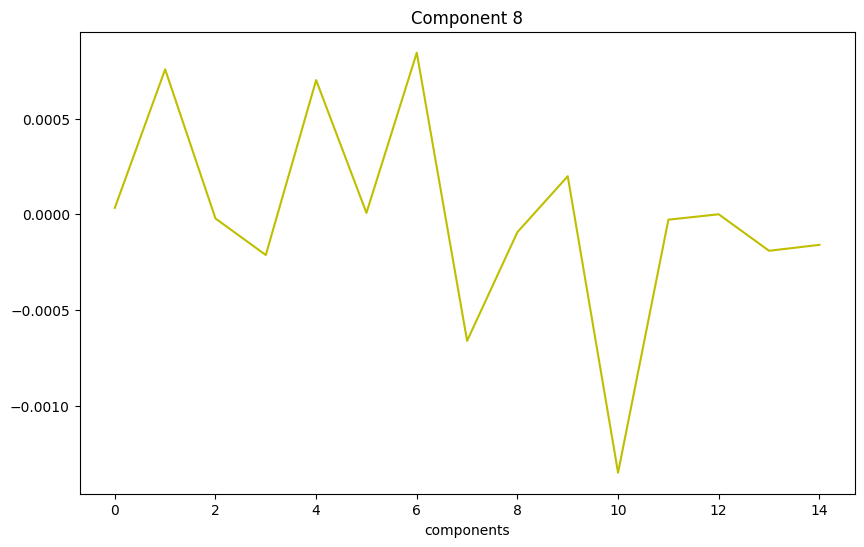

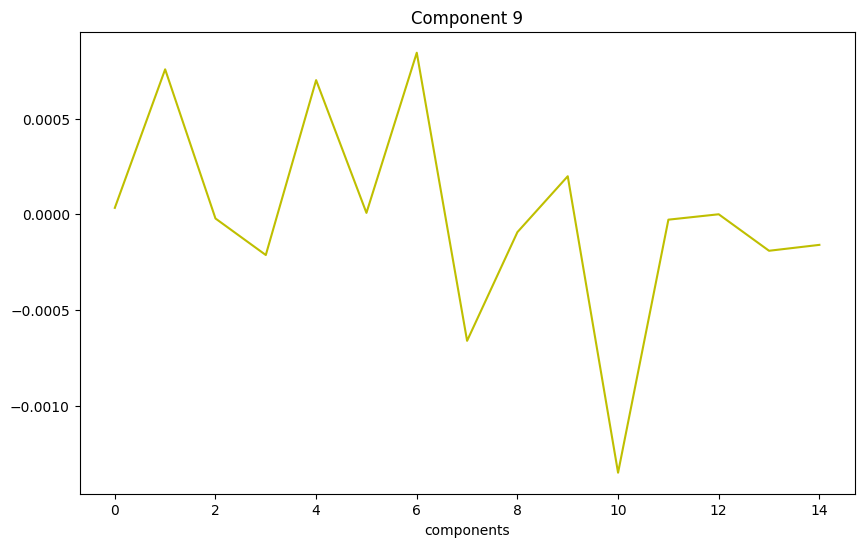

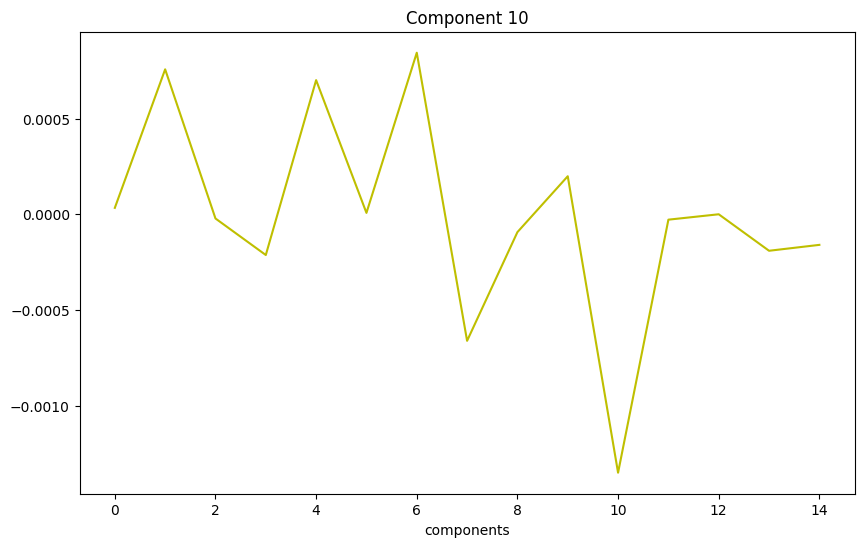

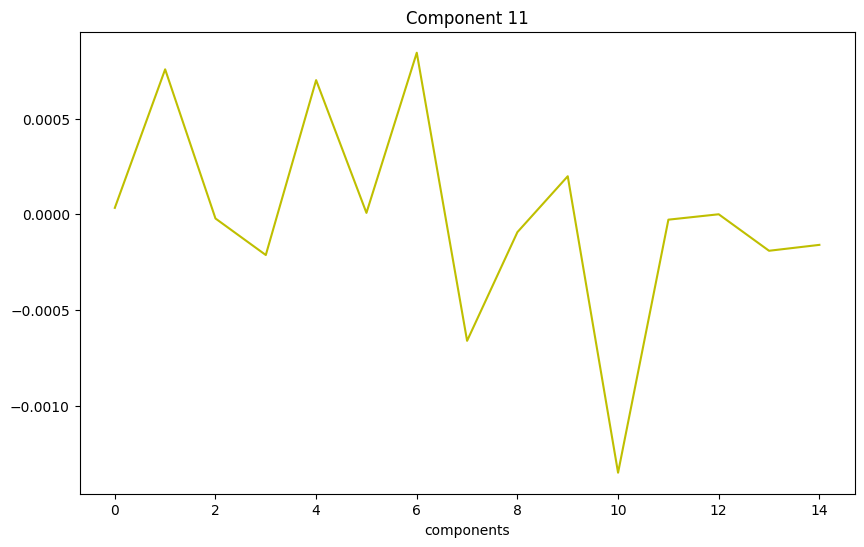

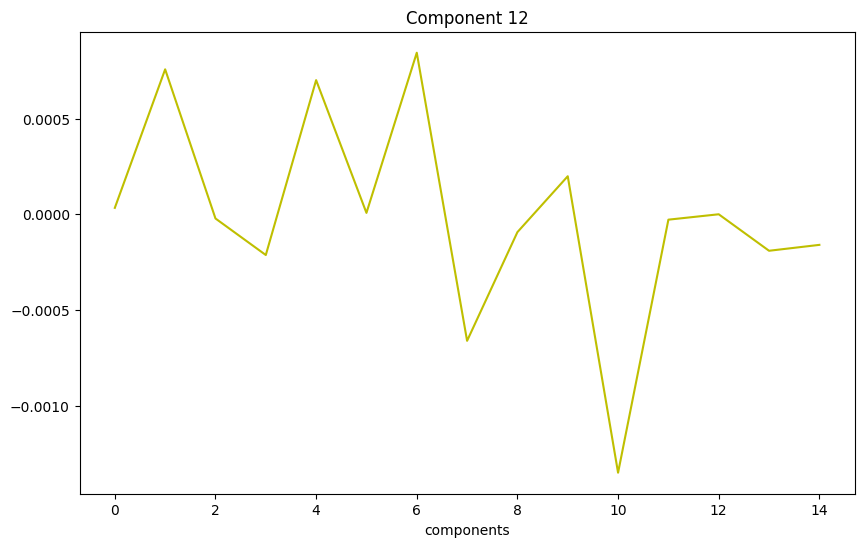

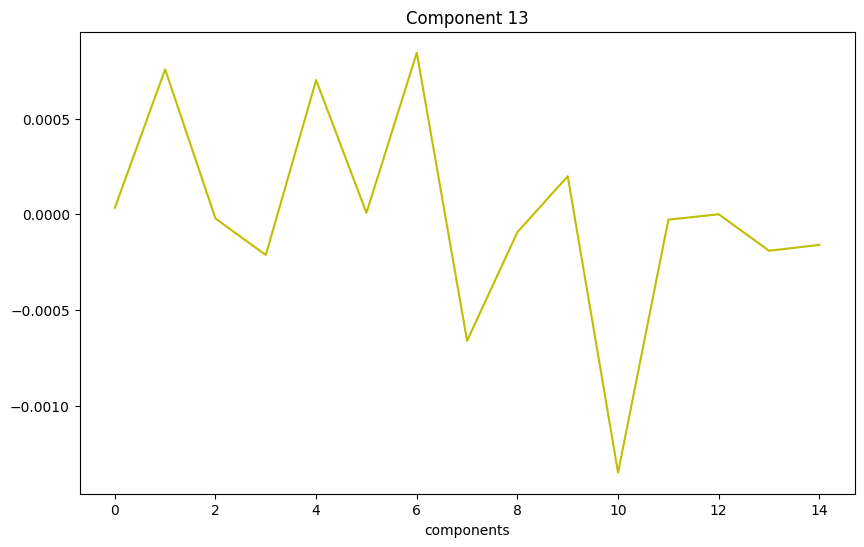

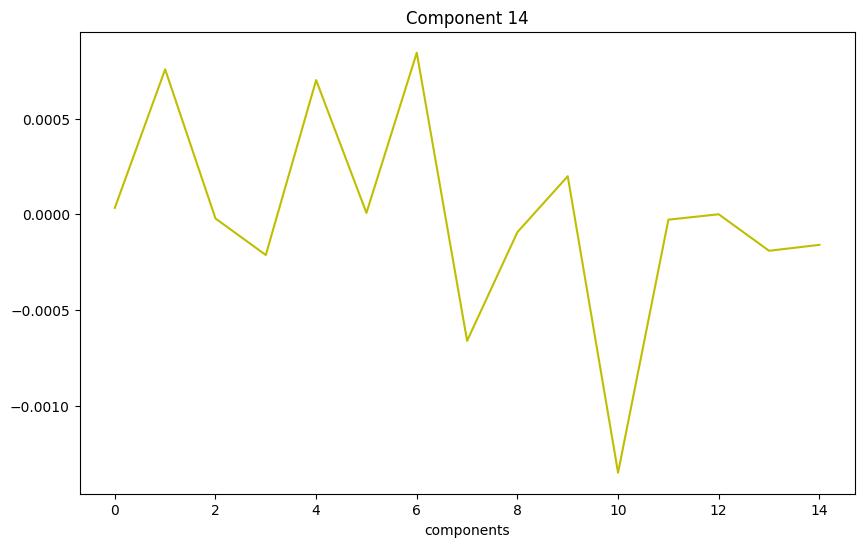

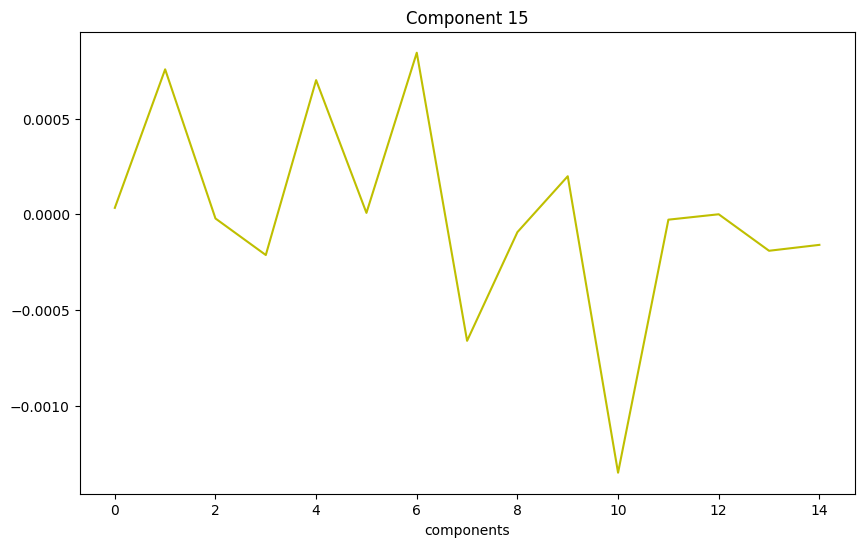

In [44]:
for i in range(1,16):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("components")
    plt.plot(hlle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_5980\843787051.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


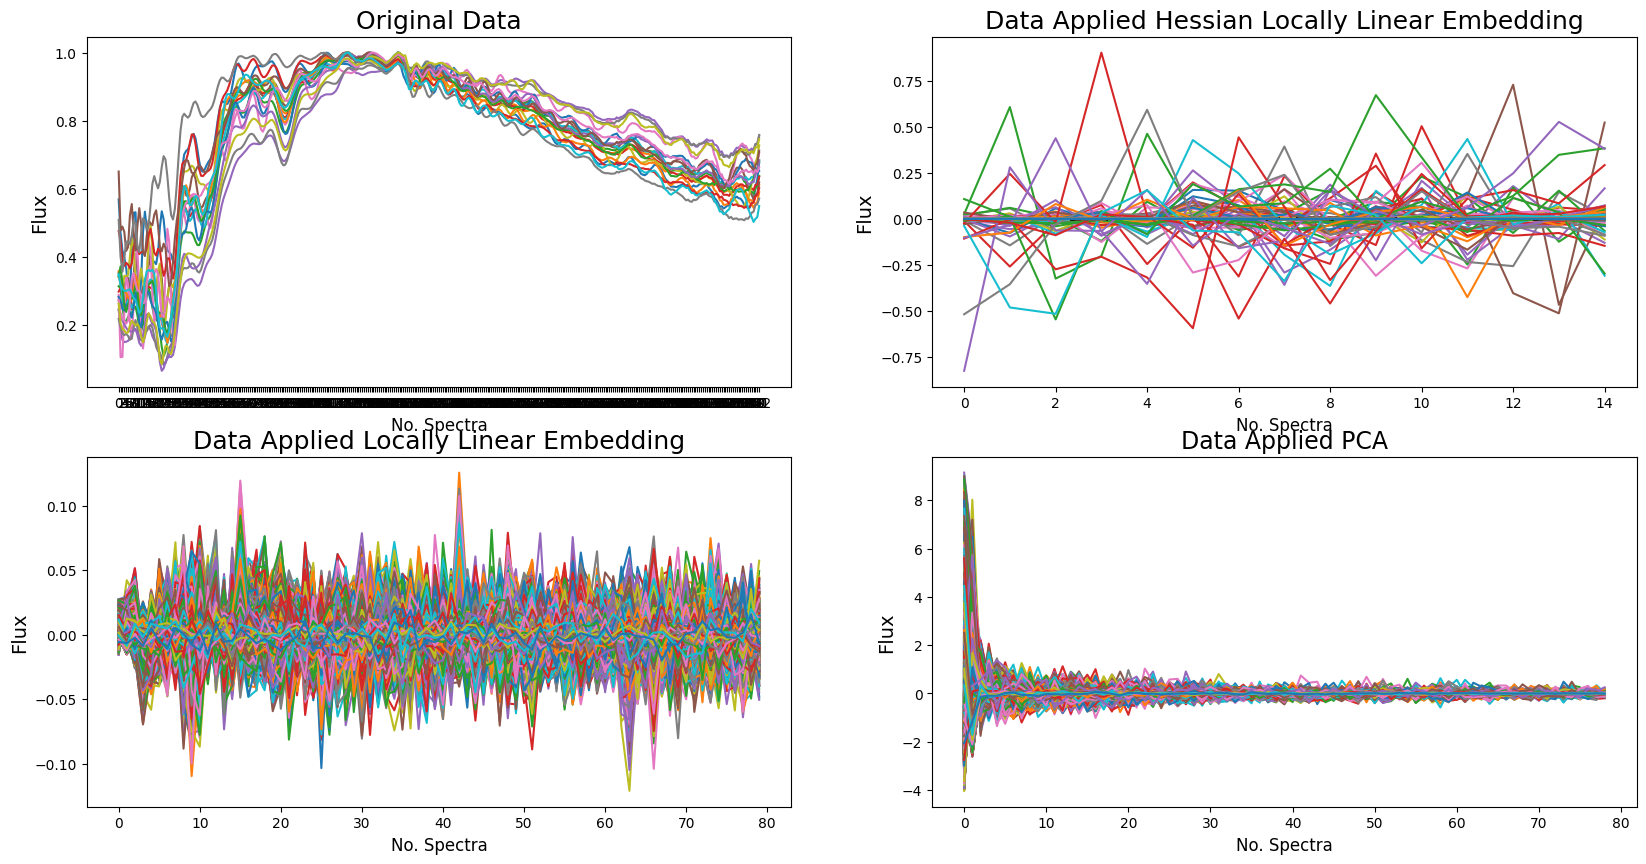

In [45]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:20])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data_t)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data_t)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data_t)

fig.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_23428\3897460035.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


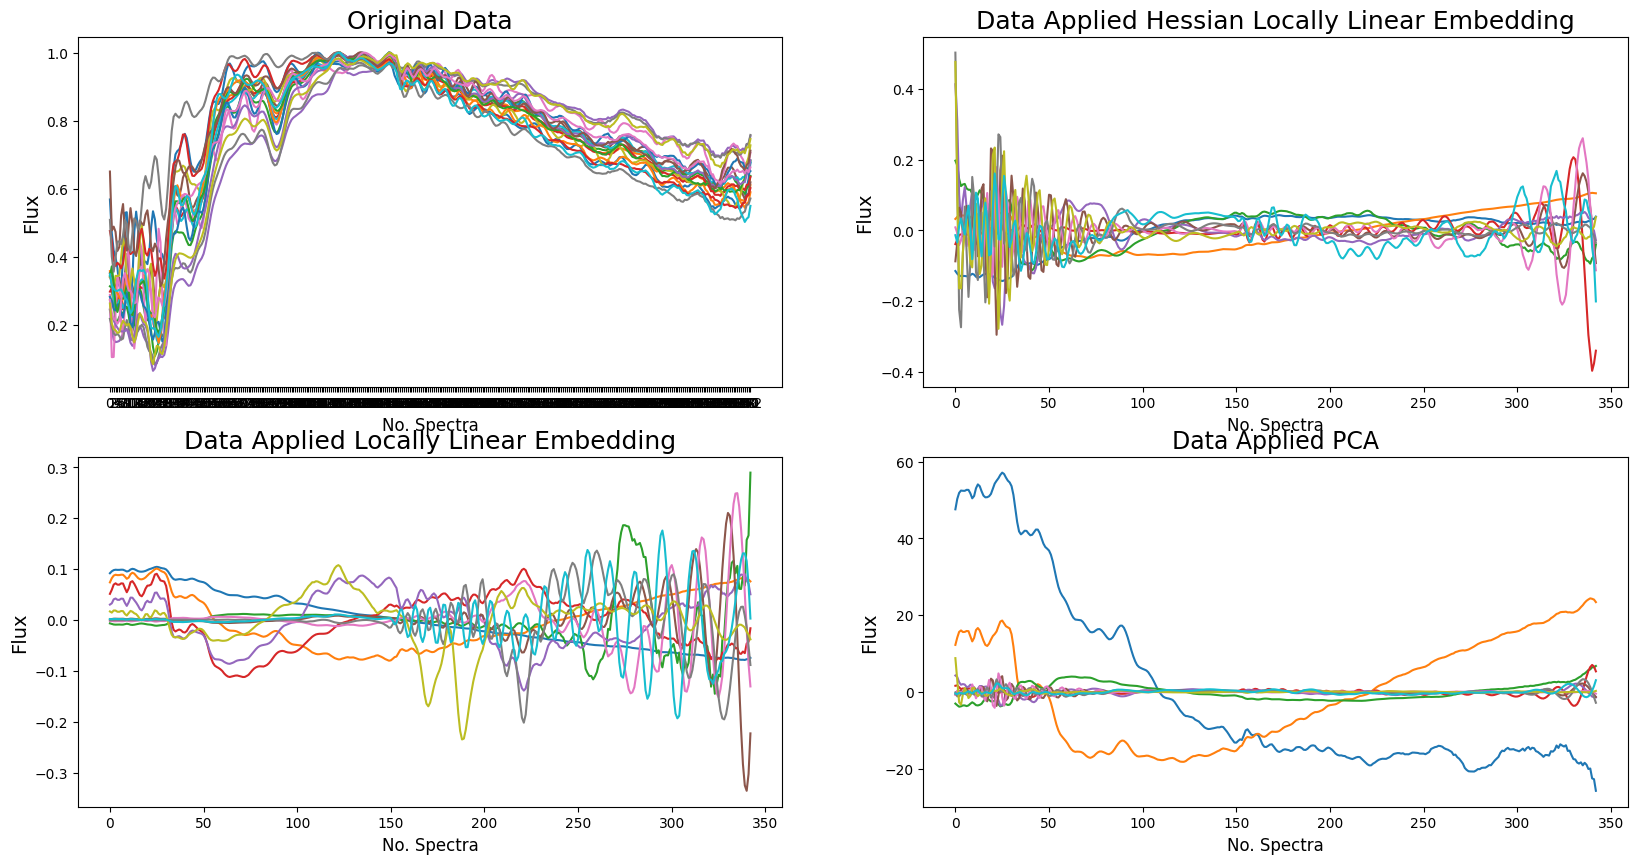

In [46]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:20])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()

In [35]:
lle_transformed_data.to_csv("DATA_LLE_RG.csv", index=False)

In [36]:
hlle_transformed_data.to_csv("DATA_HESSIAN_NP.csv", index=False)

In [37]:
pca_transformed_data.to_csv("DATA_PCA.csv", index=False)